<h1 id="logo"><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Logo_EAFIT.png" width="350"  /></h1>

# **ENTREGA 1: EDA y Baseline**

<hr style="border:2px solid #004B85"> </hr>


## Modelo predicitivo de desgaste (intención de renuncia) de empleados de la compañia IBM (Scope: Clasificación)

<hr style="border:2px solid #004B85"> </hr>

# Machine Learning Aplicado
## Semestre 2025-2

- #### Andrea Paola Alzate Ramirez
- #### Gustavo Adolfo Jerez Tous

<hr style="border:2px solid #004B85"> </hr>


- Este notebook fue desarrollado en Google Colab.


# **ANÁLISIS EXPLORATORIO DE DATOS**


# **1. Cargar librerías, utils y configuraciones** **bold text**

### **Importante:** Para una correcta instalación de pycaret se debe ejecutar este notebook escogiendo el runtime versión 2025.07, el cual corre sobre python 3.11, necesario para instalar las librerías adecuadas.

In [21]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as ut

from IPython.display import Image, display

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


In [15]:
# Configuración inicial del entorno
import sys
import warnings
warnings.filterwarnings('ignore')

# Verificar versión de Python
assert sys.version_info >= (3, 7), "Este notebook requiere Python 3.7 o superior"

print(f"✅ Python {sys.version_info.major}.{sys.version_info.minor} instalado correctamente")

✅ Python 3.11 instalado correctamente


# **2. Cargar dataset y vista previa de los datos**

In [16]:
data = pd.read_csv('dataset_ibm.csv', index_col=None)
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [17]:
# Vista general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET".center(80))
print("=" * 80)

# Mostrar primeras filas con formato mejorado
display(data.head().style.background_gradient(cmap='coolwarm', subset=['DailyRate']))

# Información detallada
print("\n" + "=" * 80)
print("ESTRUCTURA DE DATOS".center(80))
print("=" * 80)
data.info()

# Estadísticas descriptivas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS".center(80))
print("=" * 80)
display(data.describe().round(2).T)

                        INFORMACIÓN GENERAL DEL DATASET                         



                              ESTRUCTURA DE DATOS                               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 

count     mean     std     min     25%      50%  \
Age                      1470.00    36.92    9.14   18.00   30.00    36.00   
DailyRate                1470.00   802.49  403.51  102.00  465.00   802.00   
DistanceFromHome         1470.00     9.19    8.11    1.00    2.00     7.00   
Education                1470.00     2.91    1.02    1.00    2.00     3.00   
EmployeeCount            1470.00     1.00    0.00    1.00    1.00     1.00   
EmployeeNumber           1470.00  1024.87  602.02    1.00  491.25  1020.50   
EnvironmentSatisfaction  1470.00     2.72    1.09    1.00    2.00     3.00   
HourlyRate               1470.00    65.89   20.33   30.00   48.00    66.00   
JobInvolvement           1470.00     2.73    0.71    1.00    2.00     3.00   
JobLevel                 1470.00     2.06    1.11    1.00    1.00     2.00   
JobSatisfaction          1470.00     2.73    1.10    1.00    2.00     3.00   
MonthlyIncome            1470.00  6502.93 4707.96 1009.00 2911.00  4919.00   
MonthlyRate              1470.00 14313.10 7117.79 2094.00 8047.00 14235.50   
NumCompaniesWorked       1470.00     2.69    2.50    0.00    1.00     2.00   
PercentSalaryHike        1470.00    15.21    3.66   11.00   12.00    14.00   
PerformanceRating        1470.00     3.15    0.36    3.00    3.00     3.00   
RelationshipSatisfaction 1470.00     2.71    1.08    1.00    2.00     3.00   
StandardHours            1470.00    80.00    0.00   80.00   80.00    80.00   
StockOptionLevel         1470.00     0.79    0.85    0.00    0.00     1.00   
TotalWorkingYears        1470.00    11.28    7.78    0.00    6.00    10.00   
TrainingTimesLastYear    1470.00     2.80    1.29    0.00    2.00     3.00   
WorkLifeBalance          1470.00     2.76    0.71    1.00    2.00     3.00   
YearsAtCompany           1470.00     7.01    6.13    0.00    3.00     5.00   
YearsInCurrentRole       1470.00     4.23    3.62    0.00    2.00     3.00   
YearsSinceLastPromotion  1470.00     2.19    3.22    0.00    0.00     1.00   
YearsWithCurrManager     1470.00     4.12    3.57    0.00    2.00     3.00   

                              75%      max  
Age                         43.00    60.00  
DailyRate                 1157.00  1499.00  
DistanceFromHome            14.00    29.00  
Education                    4.00     5.00  
EmployeeCount                1.00     1.00  
EmployeeNumber            1555.75  2068.00  
EnvironmentSatisfaction      4.00     4.00  
HourlyRate                  83.75   100.00  
JobInvolvement               3.00     4.00  
JobLevel                     3.00     5.00  
JobSatisfaction              4.00     4.00  
MonthlyIncome             8379.00 19999.00  
MonthlyRate              20461.50 26999.00  
NumCompaniesWorked           4.00     9.00  
PercentSalaryHike           18.00    25.00  
PerformanceRating            3.00     4.00  
RelationshipSatisfaction     4.00     4.00  
StandardHours               80.00    80.00  
StockOptionLevel             1.00     3.00  
TotalWorkingYears           15.00    40.00  
TrainingTimesLastYear        3.00     6.00  
WorkLifeBalance              3.00     4.00  
YearsAtCompany               9.00    40.00  
YearsInCurrentRole           7.00    18.00  
YearsSinceLastPromotion      3.00    15.00  
YearsWithCurrManager         7.00    17.00

# **3. Análisis univariado: númericas y categóricas**

In [20]:
feat_target = 'Attrition'
numeric_cols = data.select_dtypes(include=[np.number]).columns
print('Variables numéricas:\n', list(numeric_cols))
categorical_cols = data.select_dtypes(include=['object']).columns
print('\nVariables categóricas\n:', list(categorical_cols))

Variables numéricas:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Variables categóricas
: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


### Mapear variable de respuesta a valores numéricos

In [21]:
data[feat_target] = data[feat_target].map({'Yes': 1, 'No': 0})
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

### Validar nulidad de variables para posible imputación

In [22]:
missing_analysis = ut.analyze_missing_values(data)
if missing_analysis is not None:
    display(missing_analysis)

✅ No hay valores faltantes en el dataset


### Analizar variables numéricas

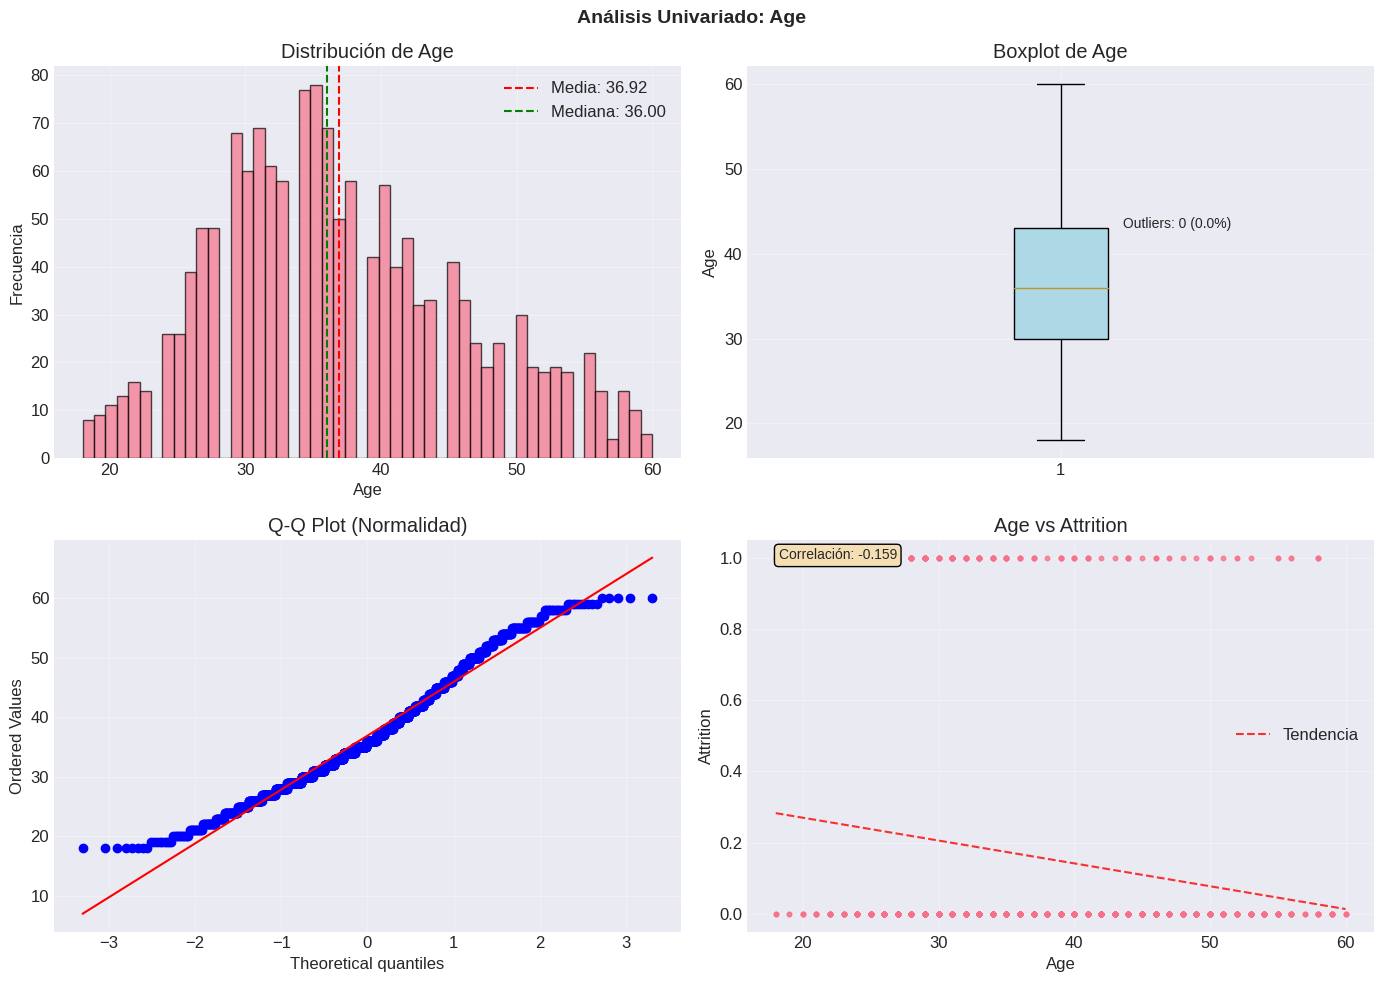

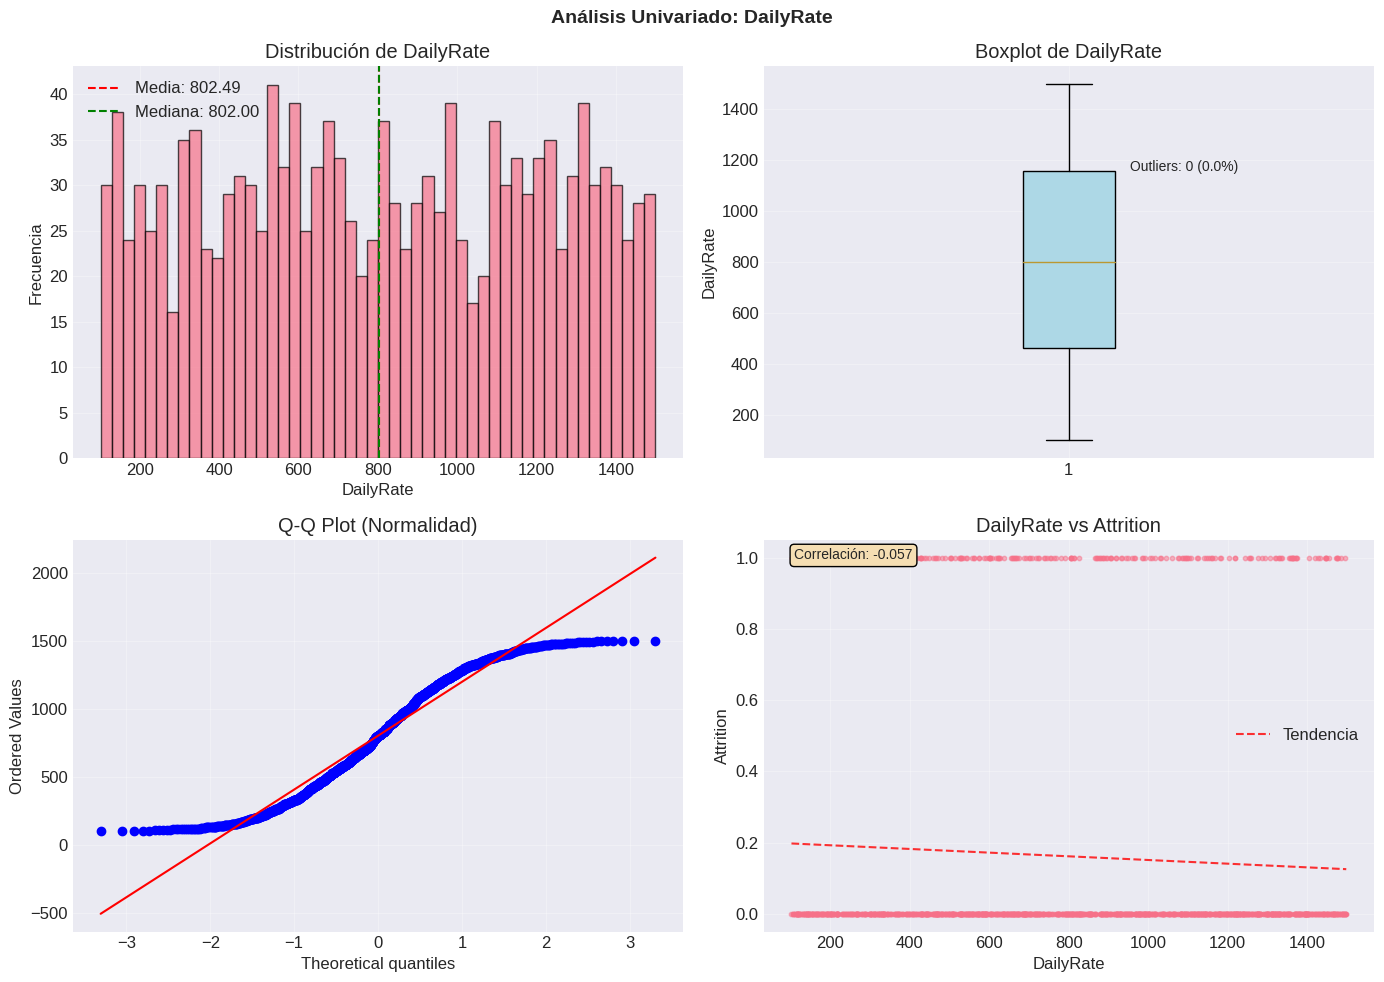

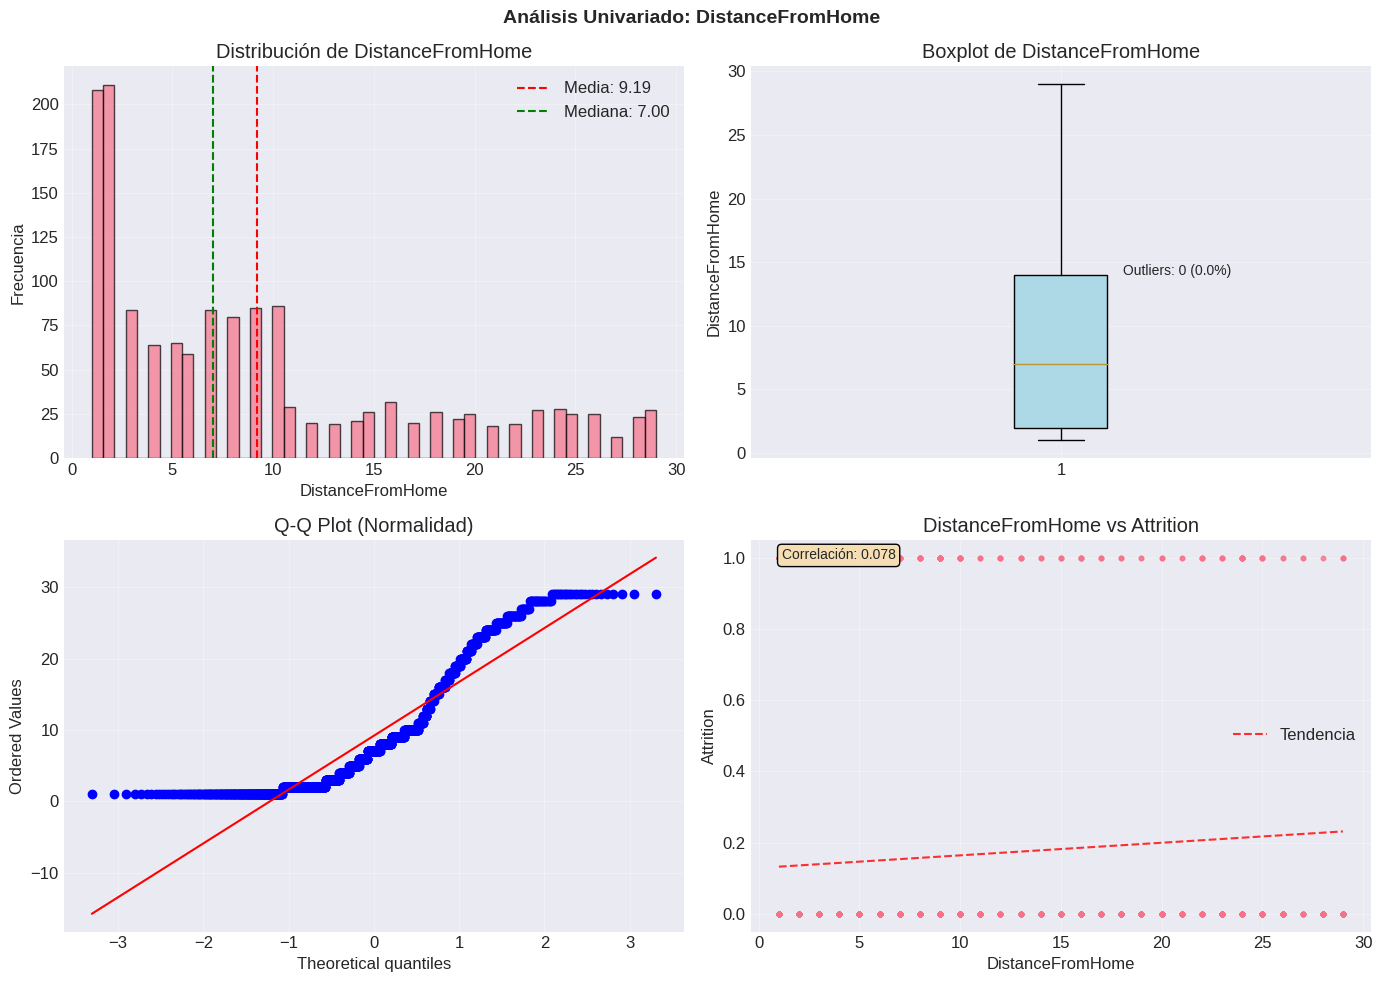

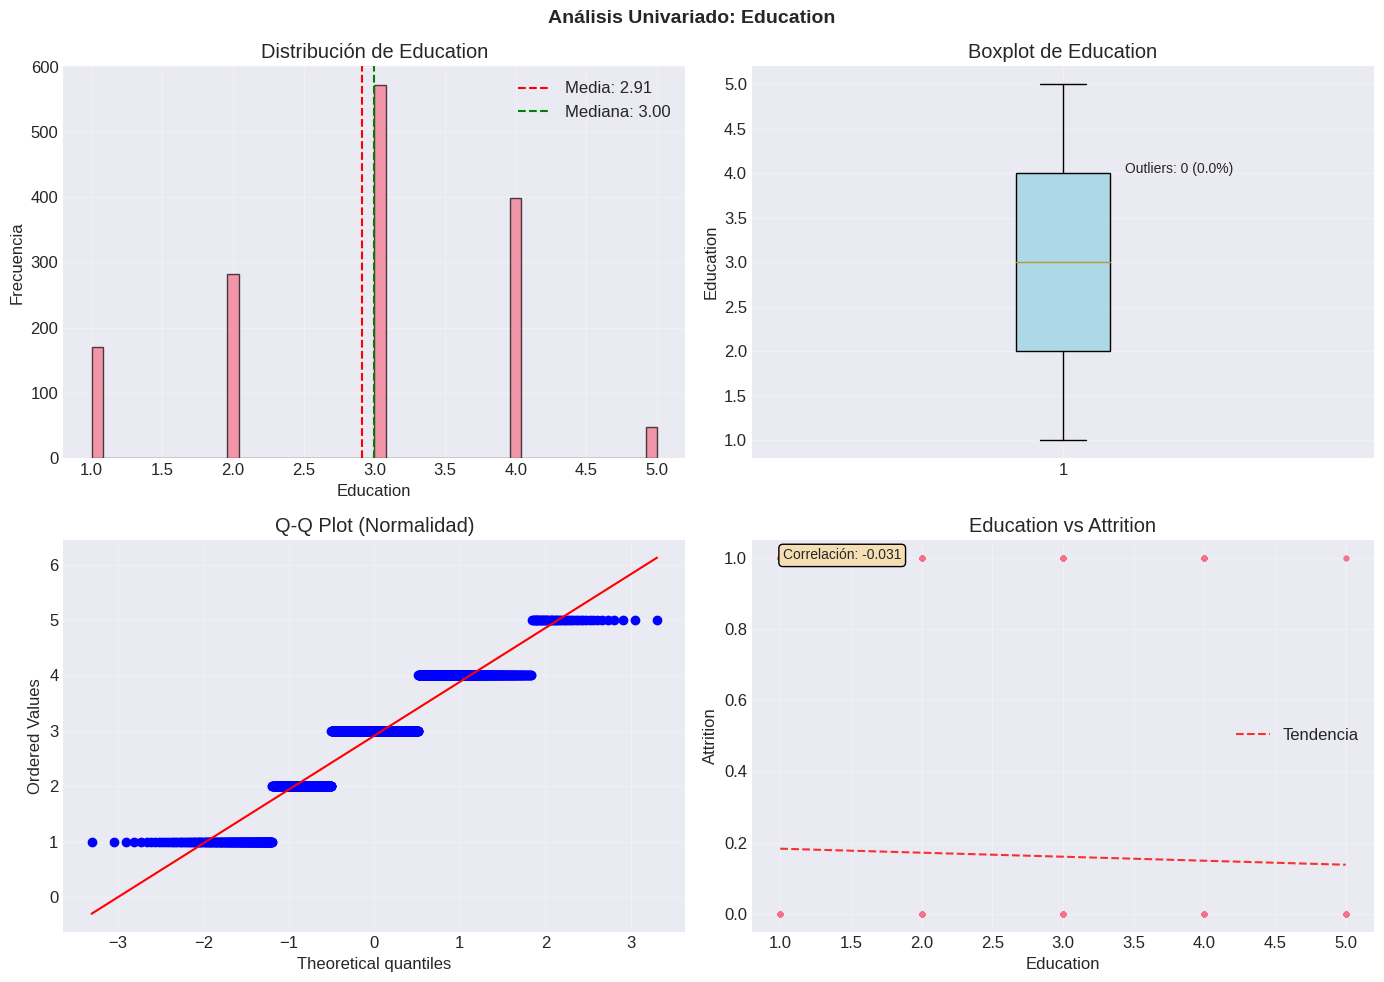

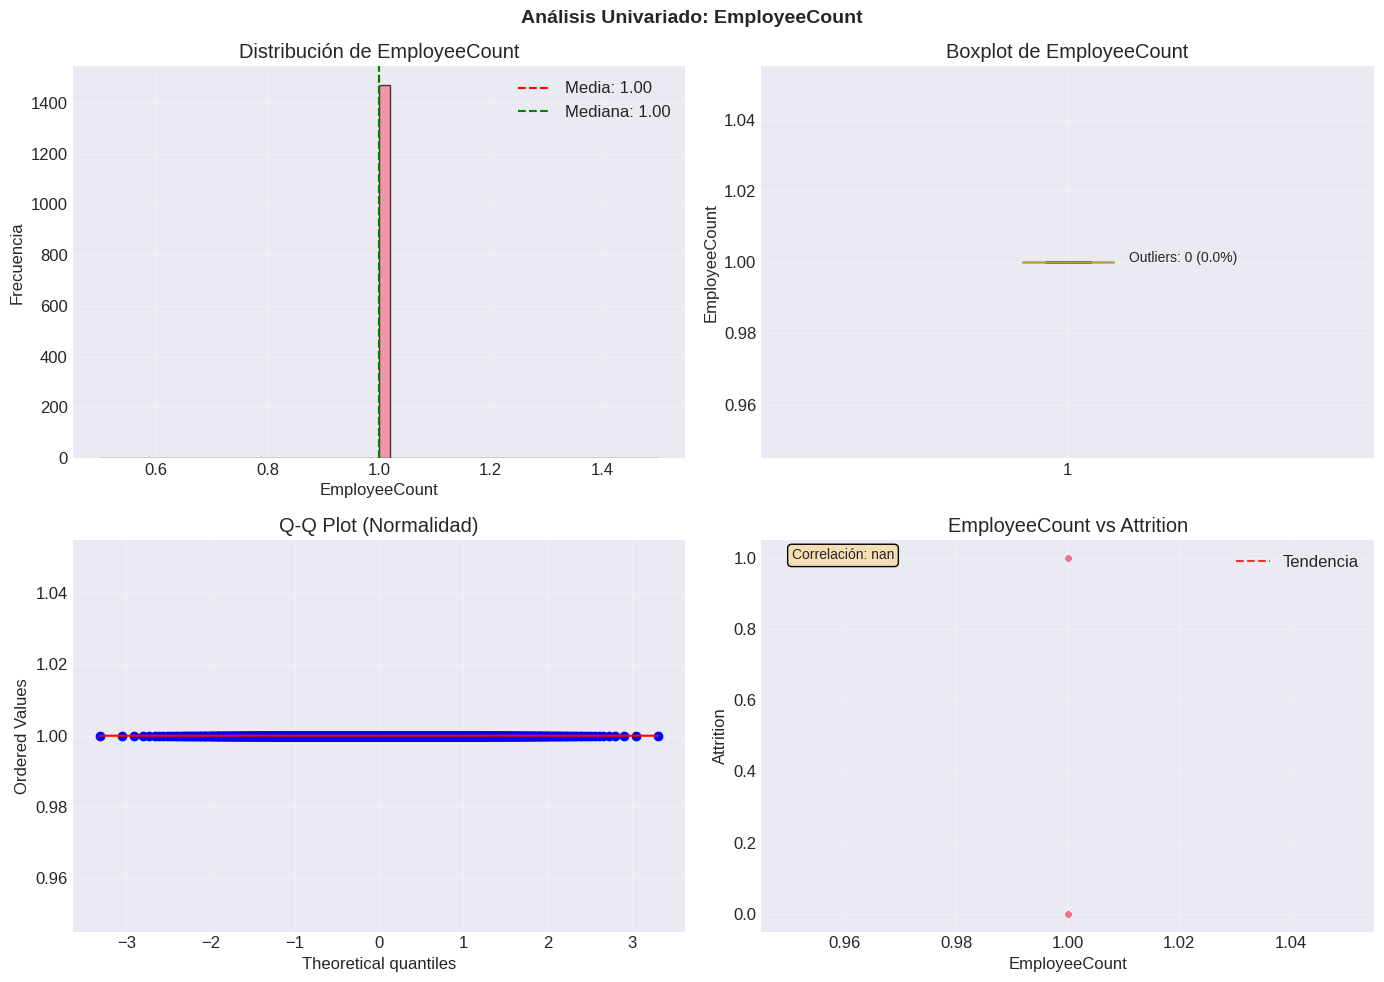

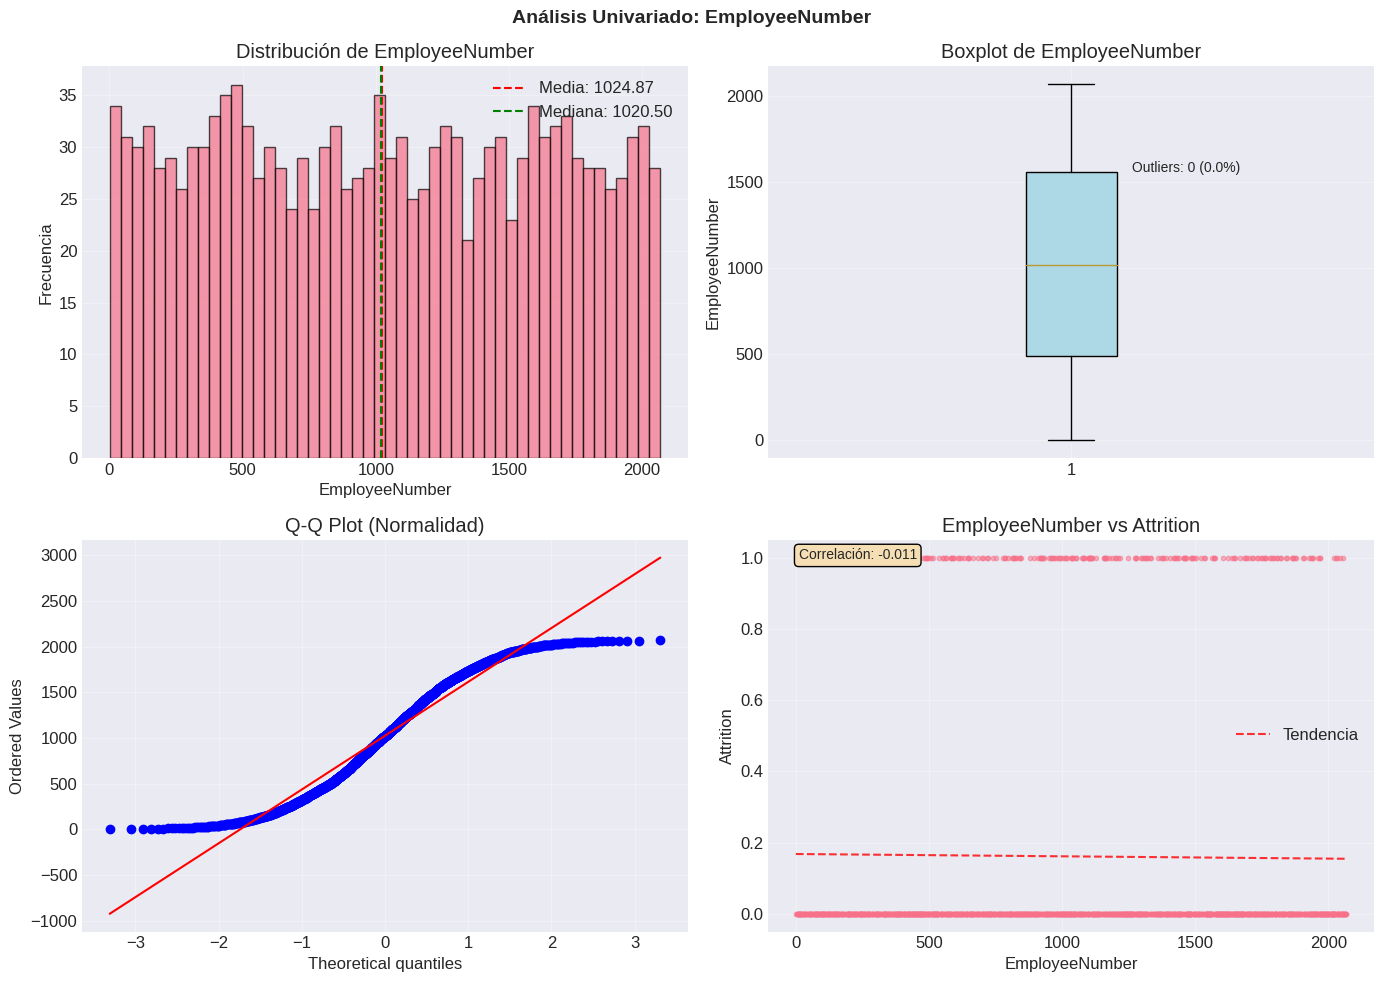

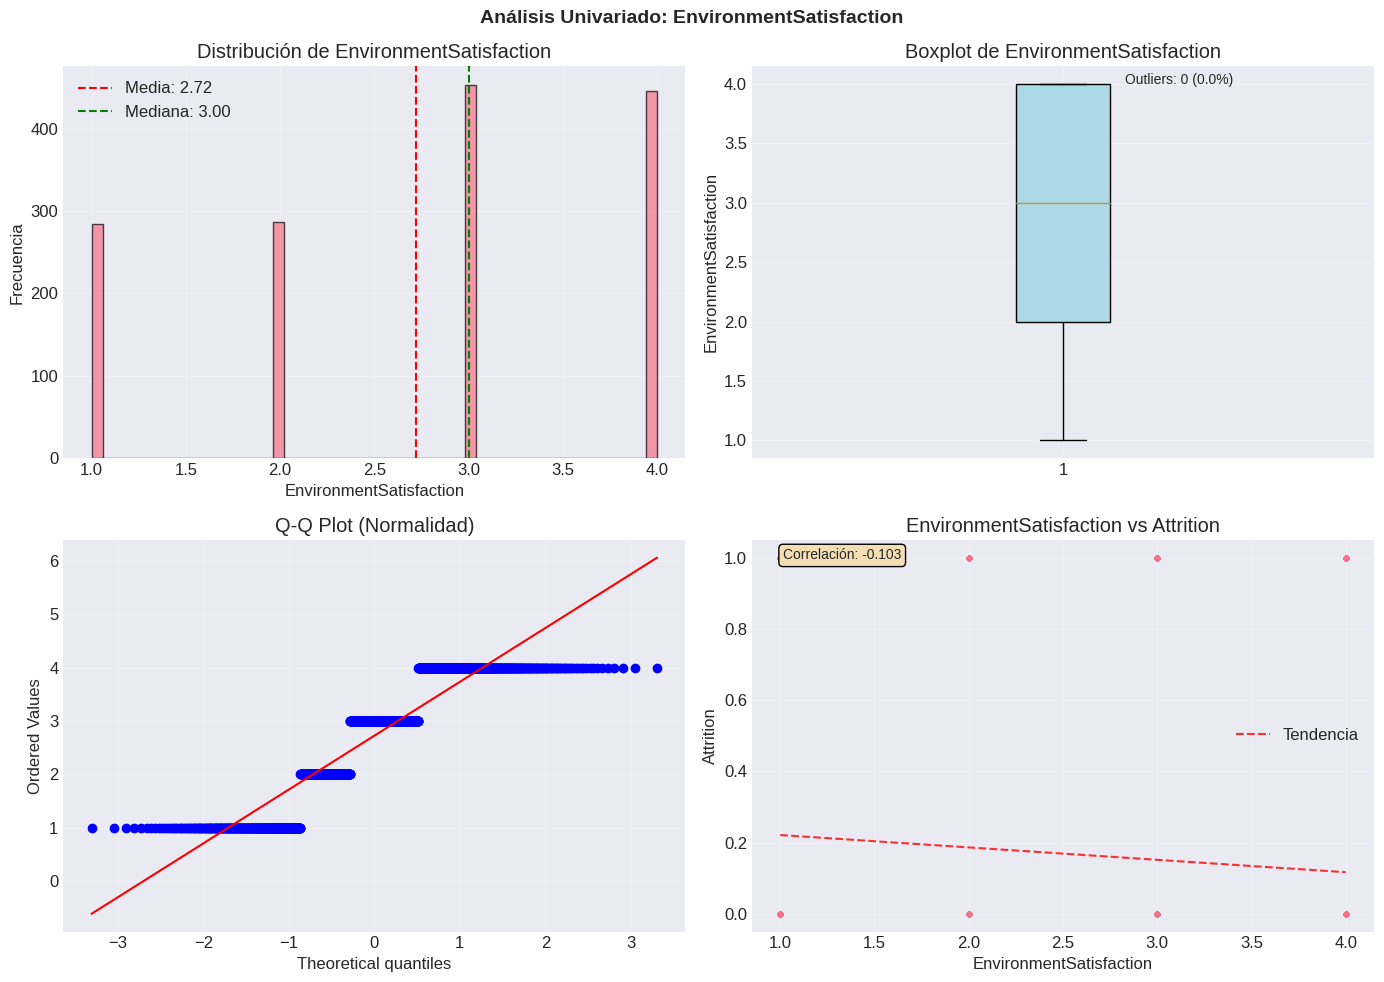

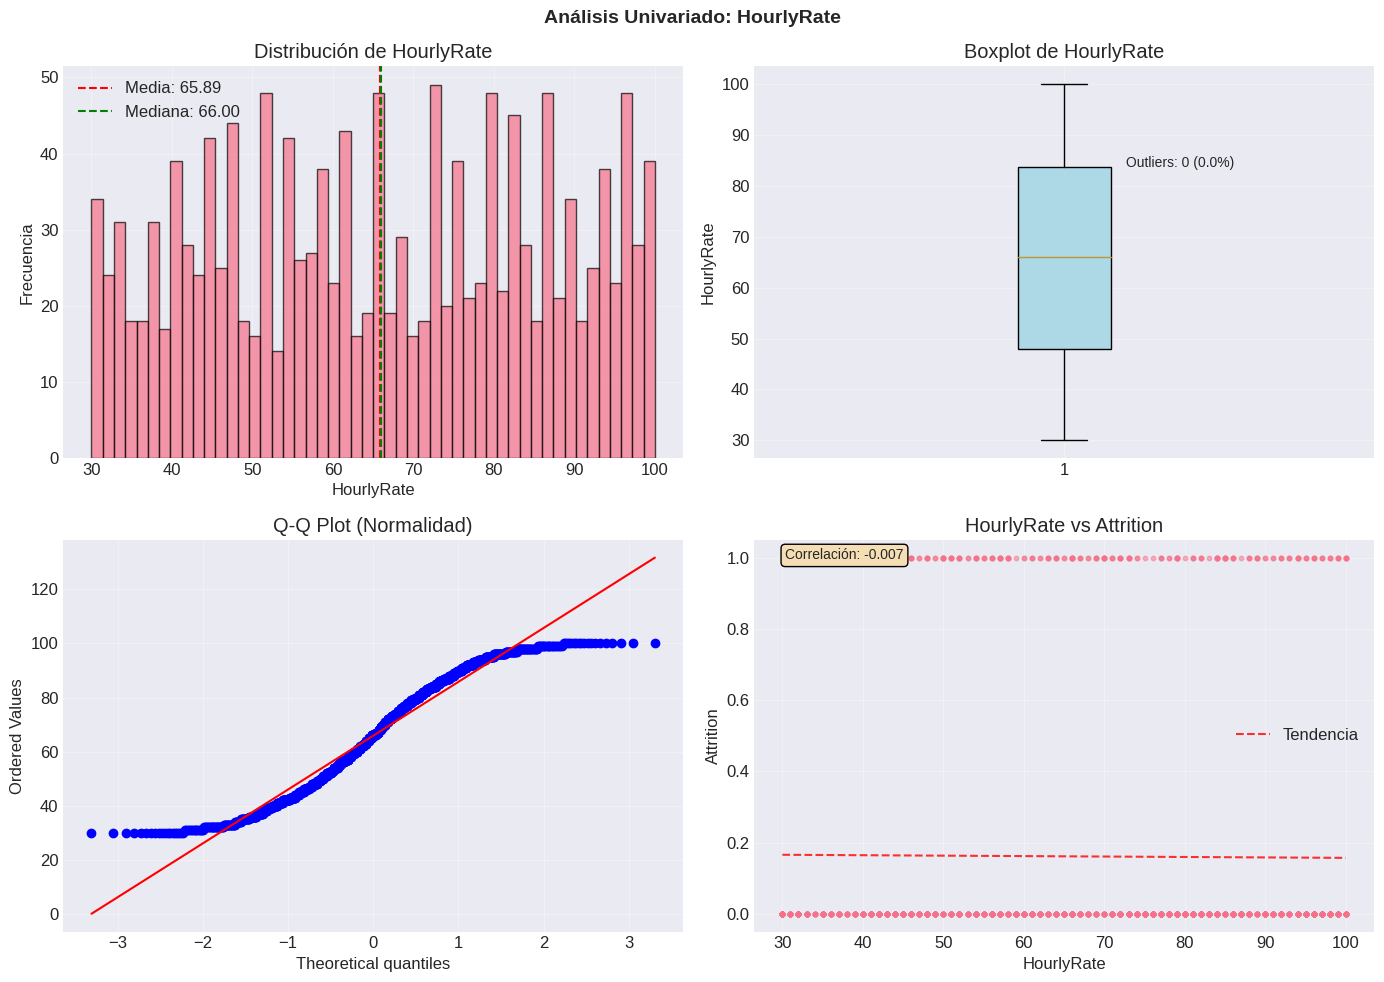

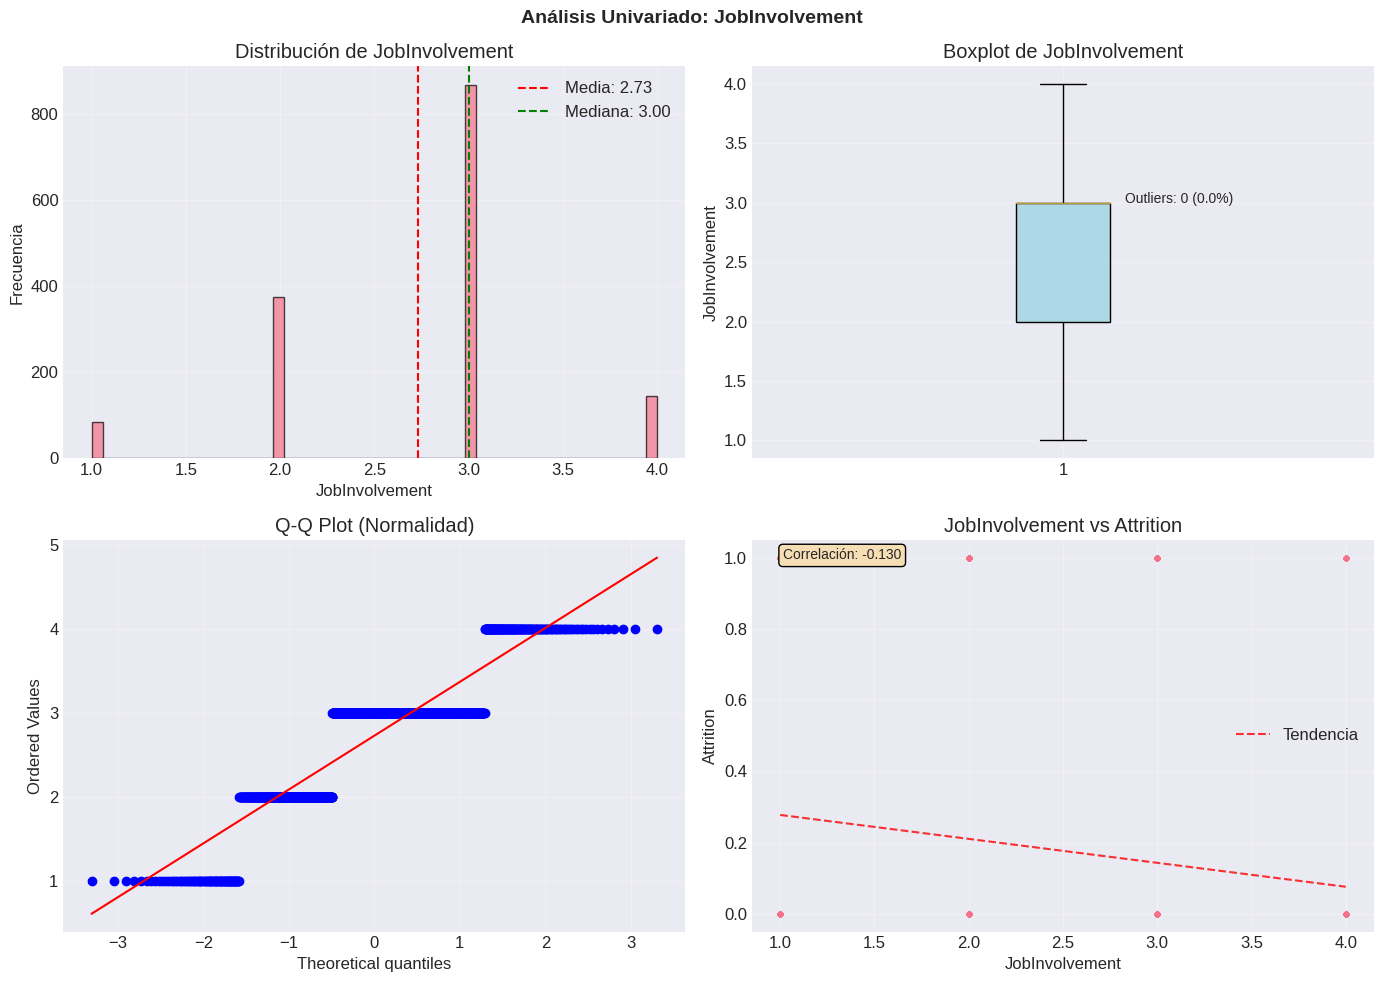

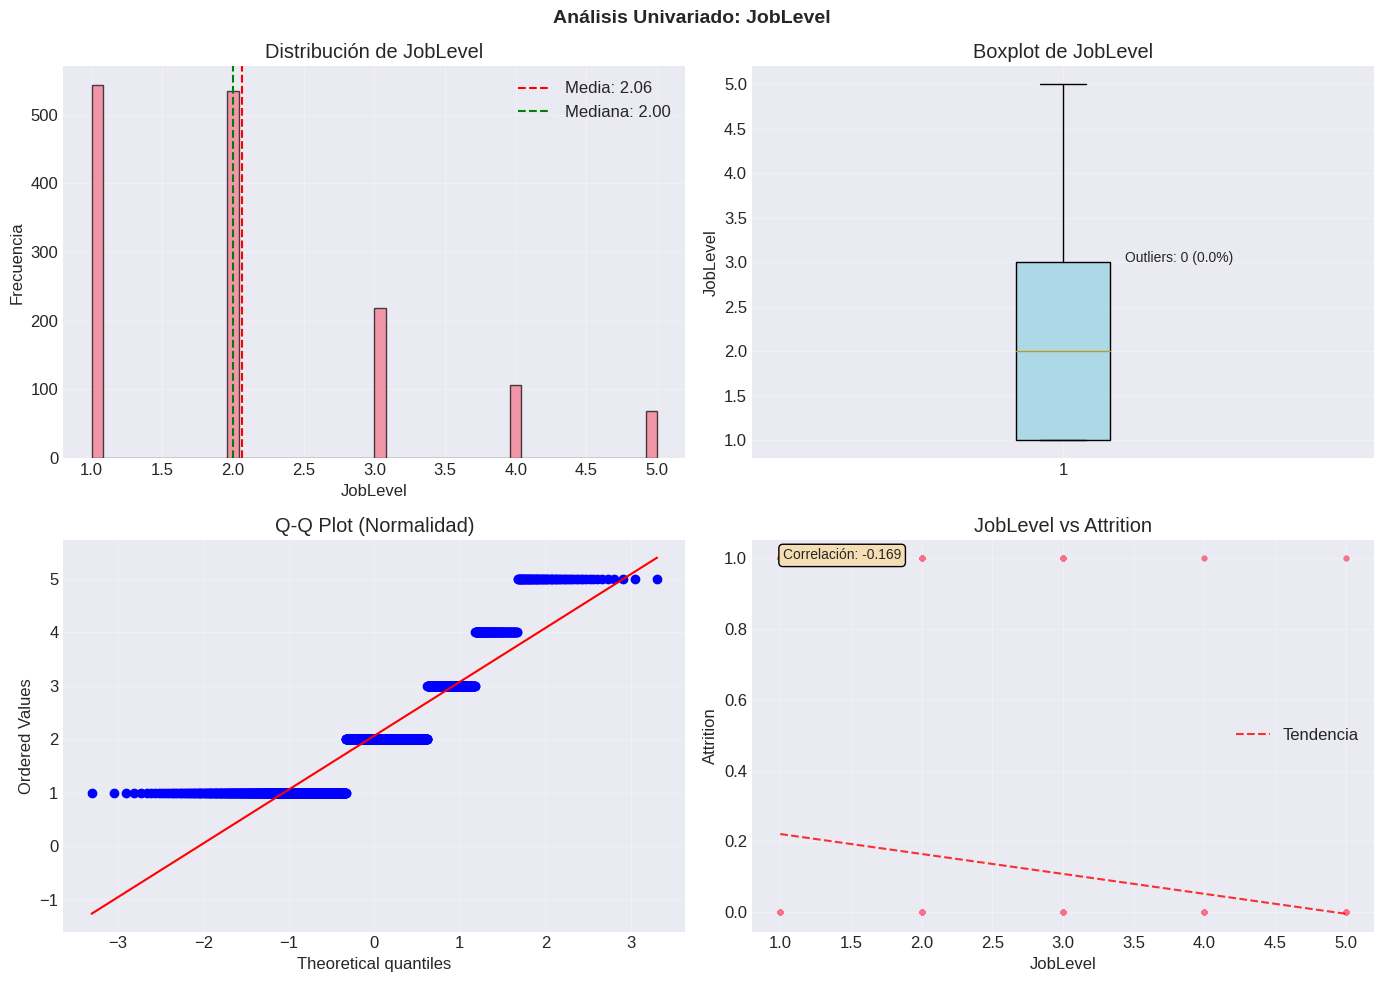

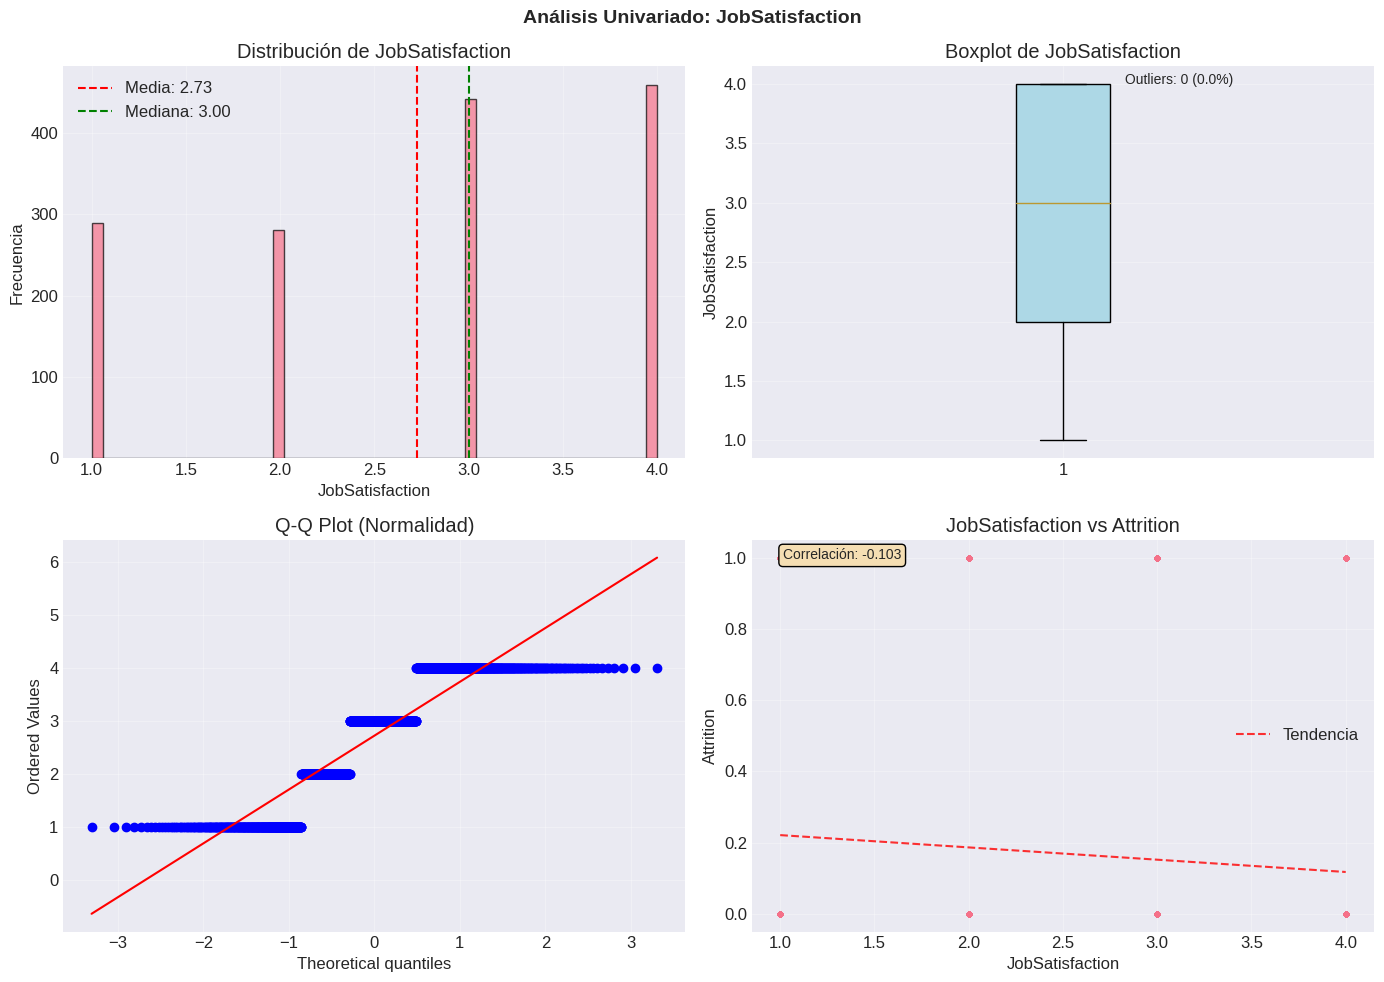

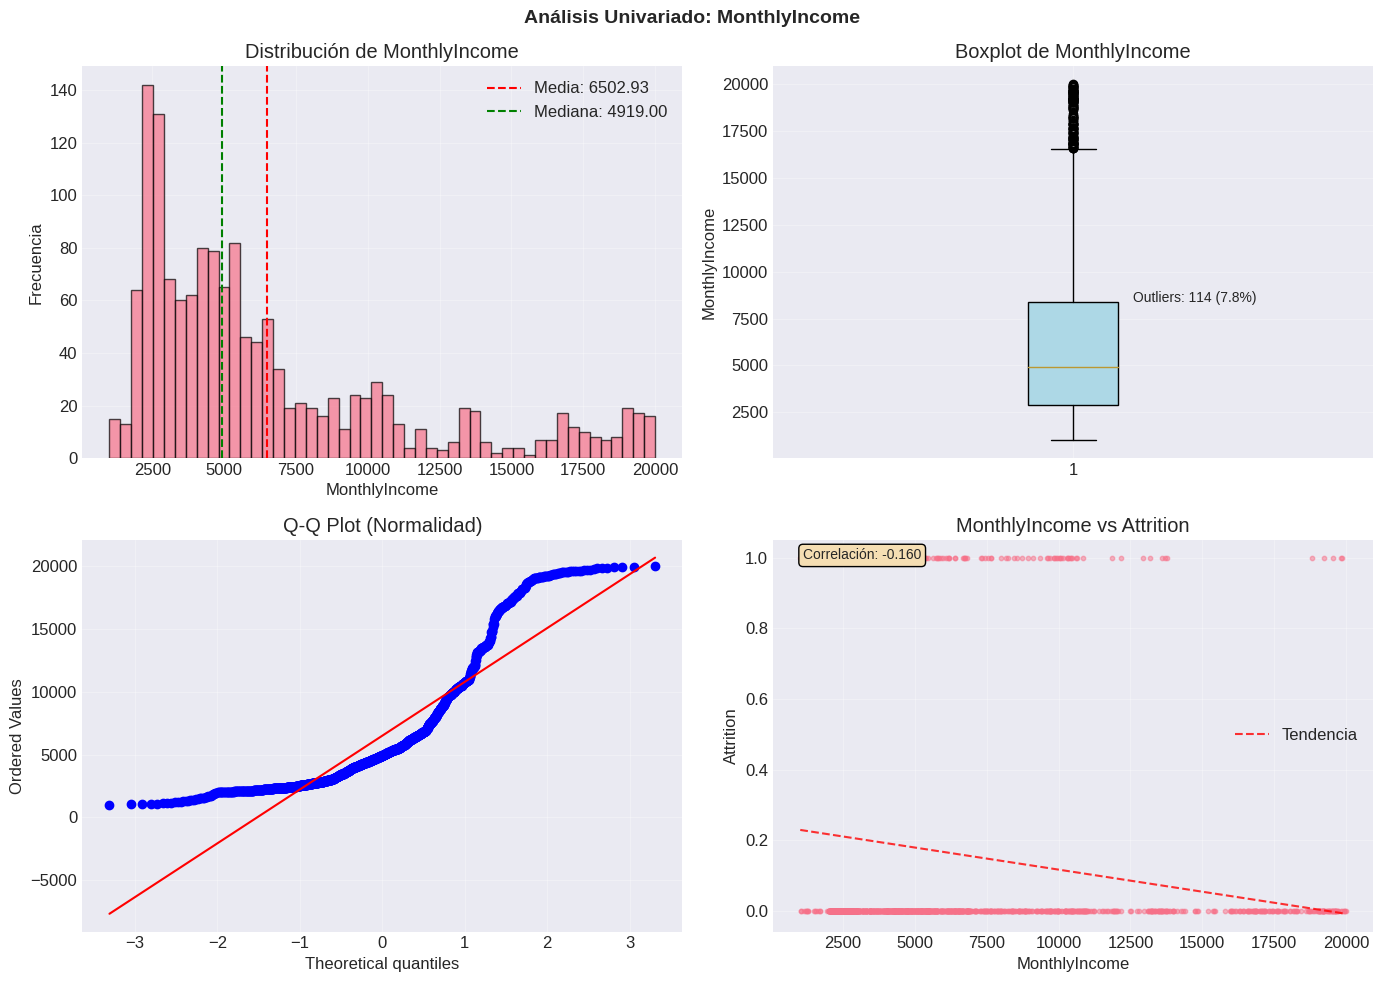

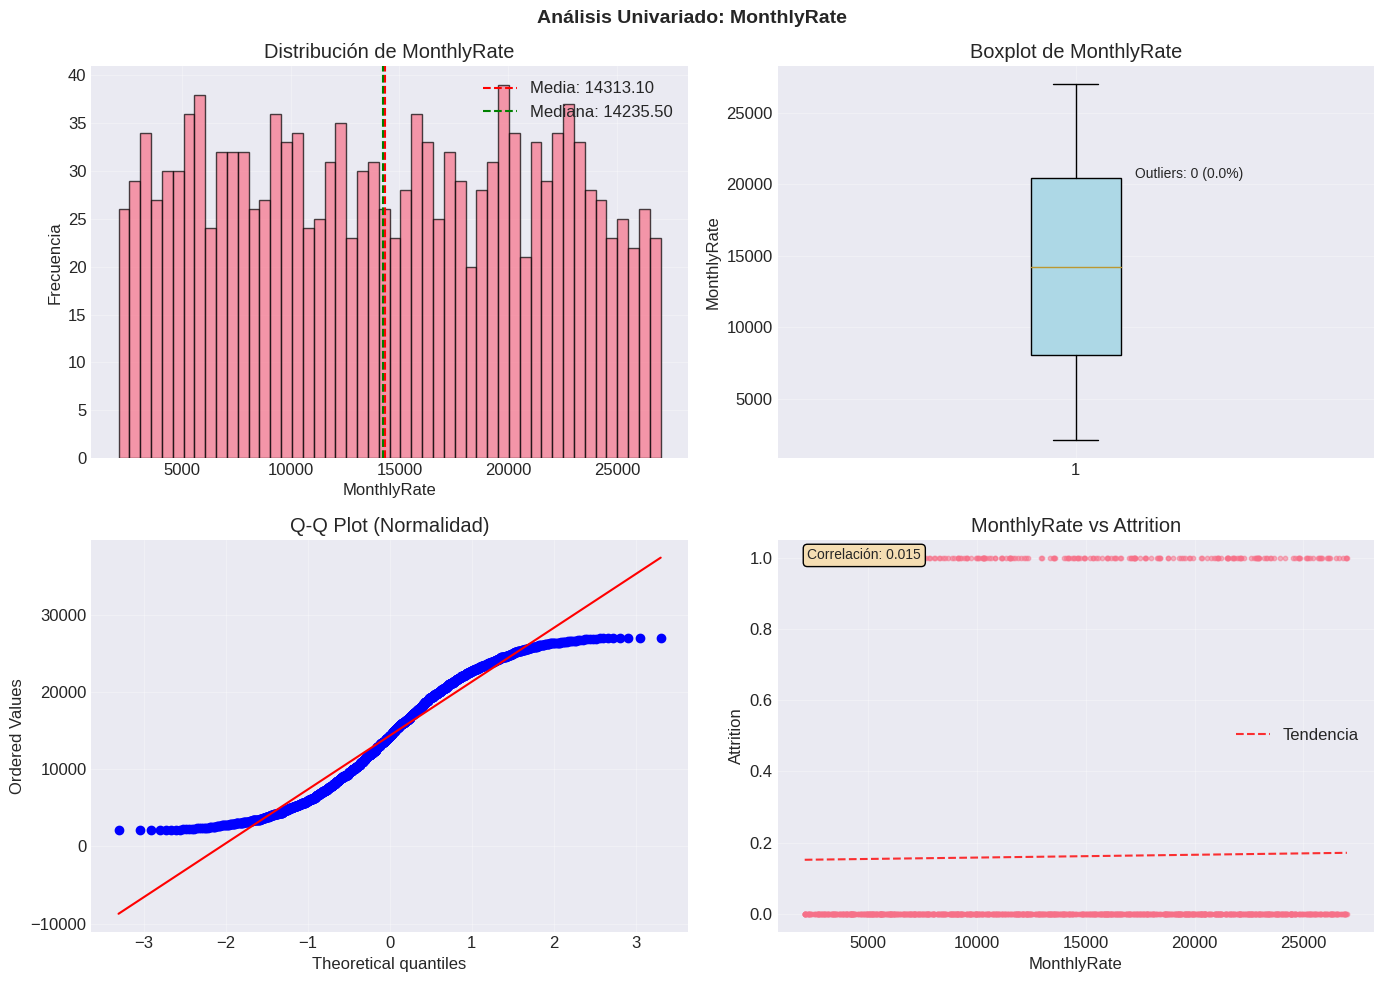

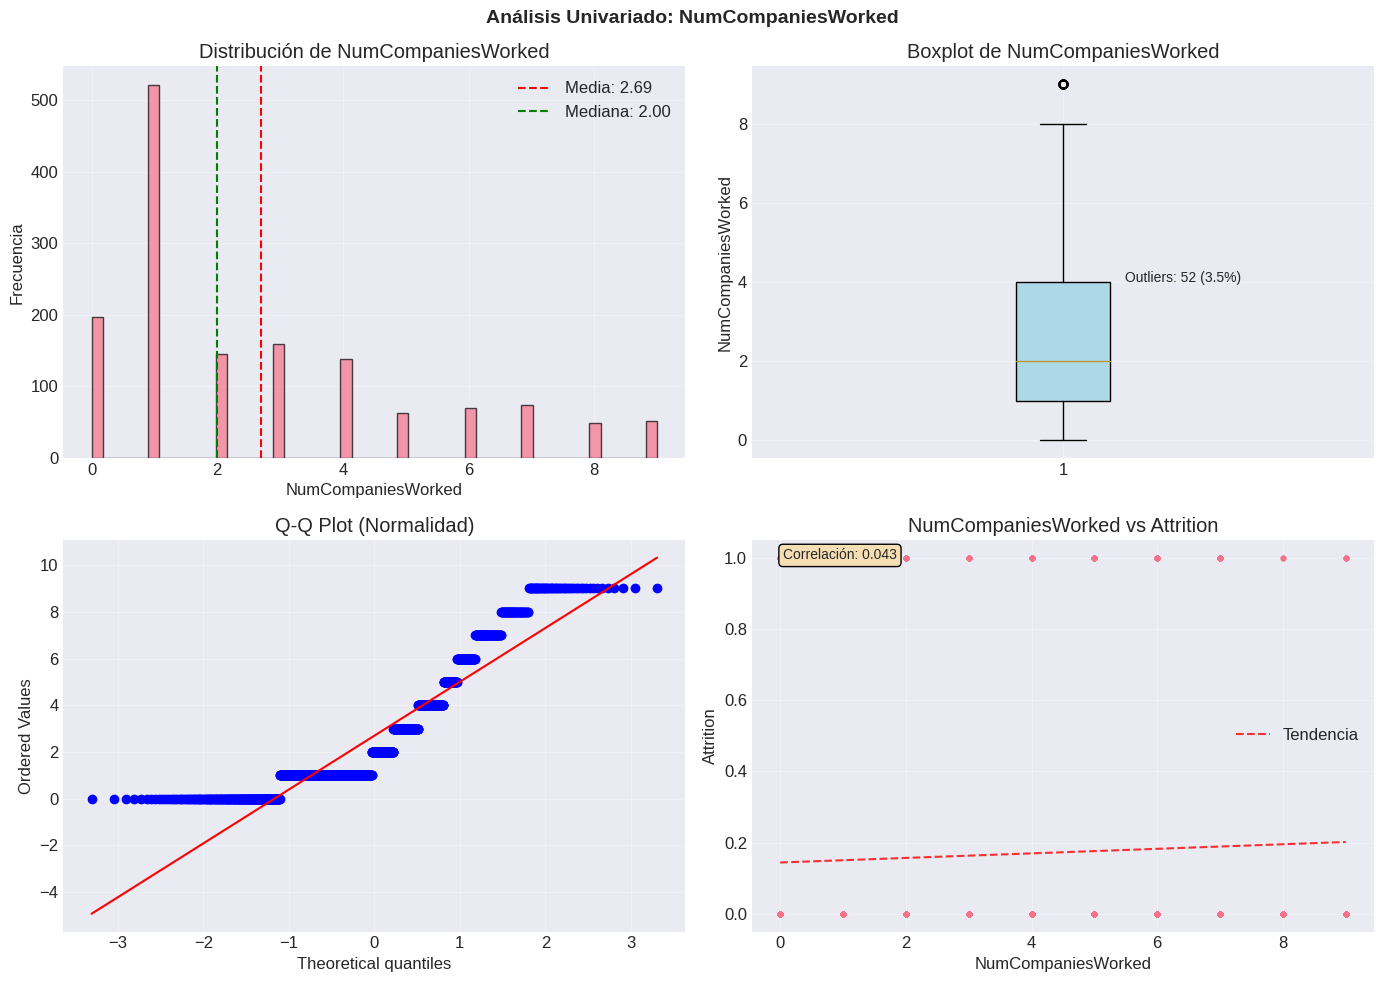

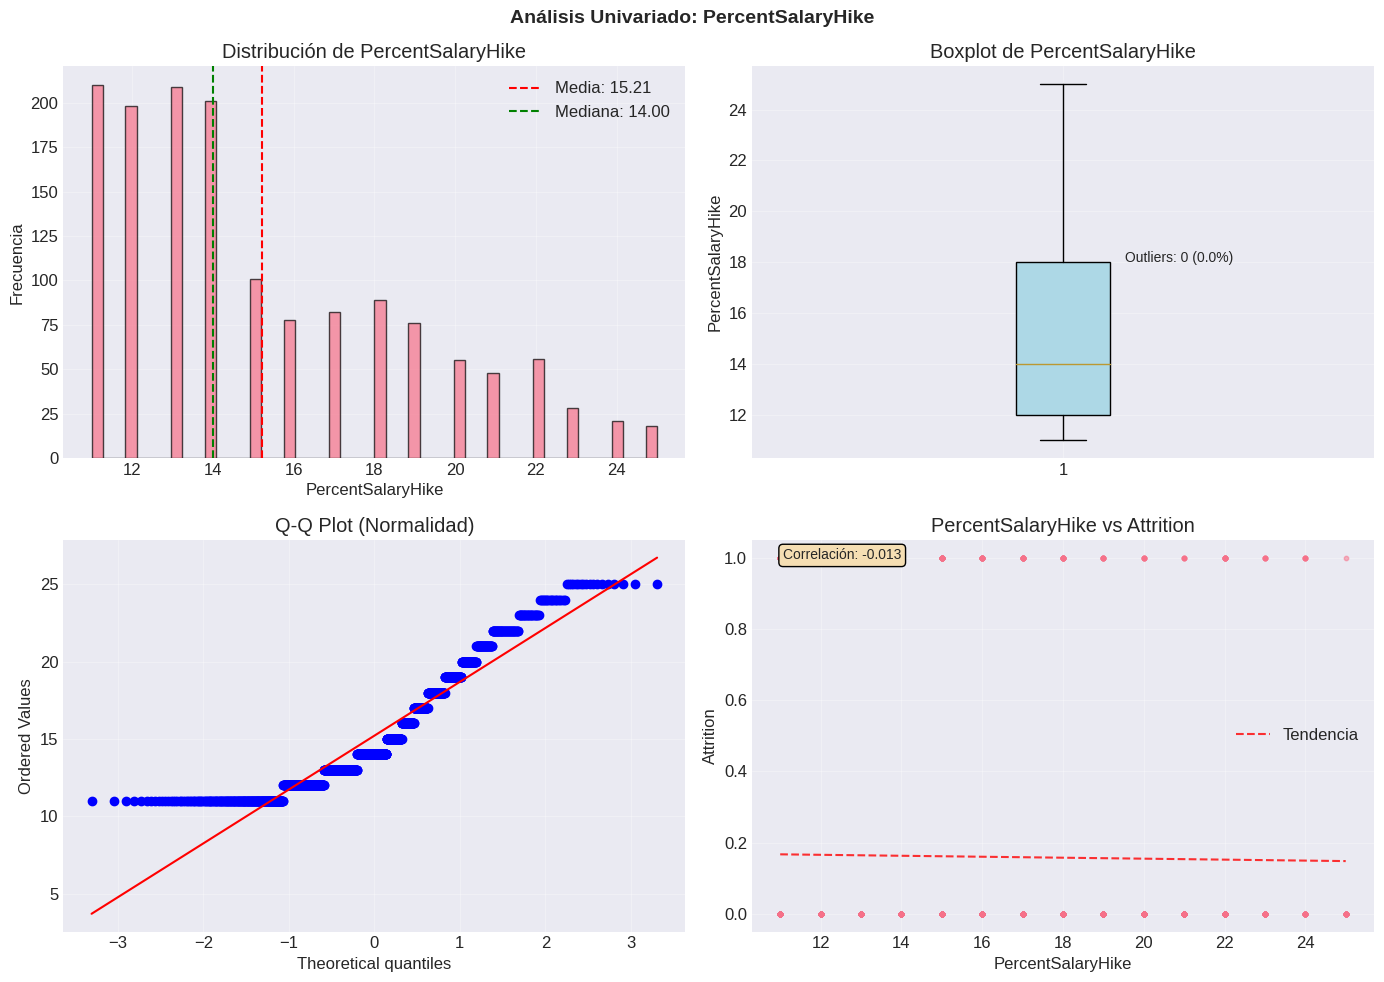

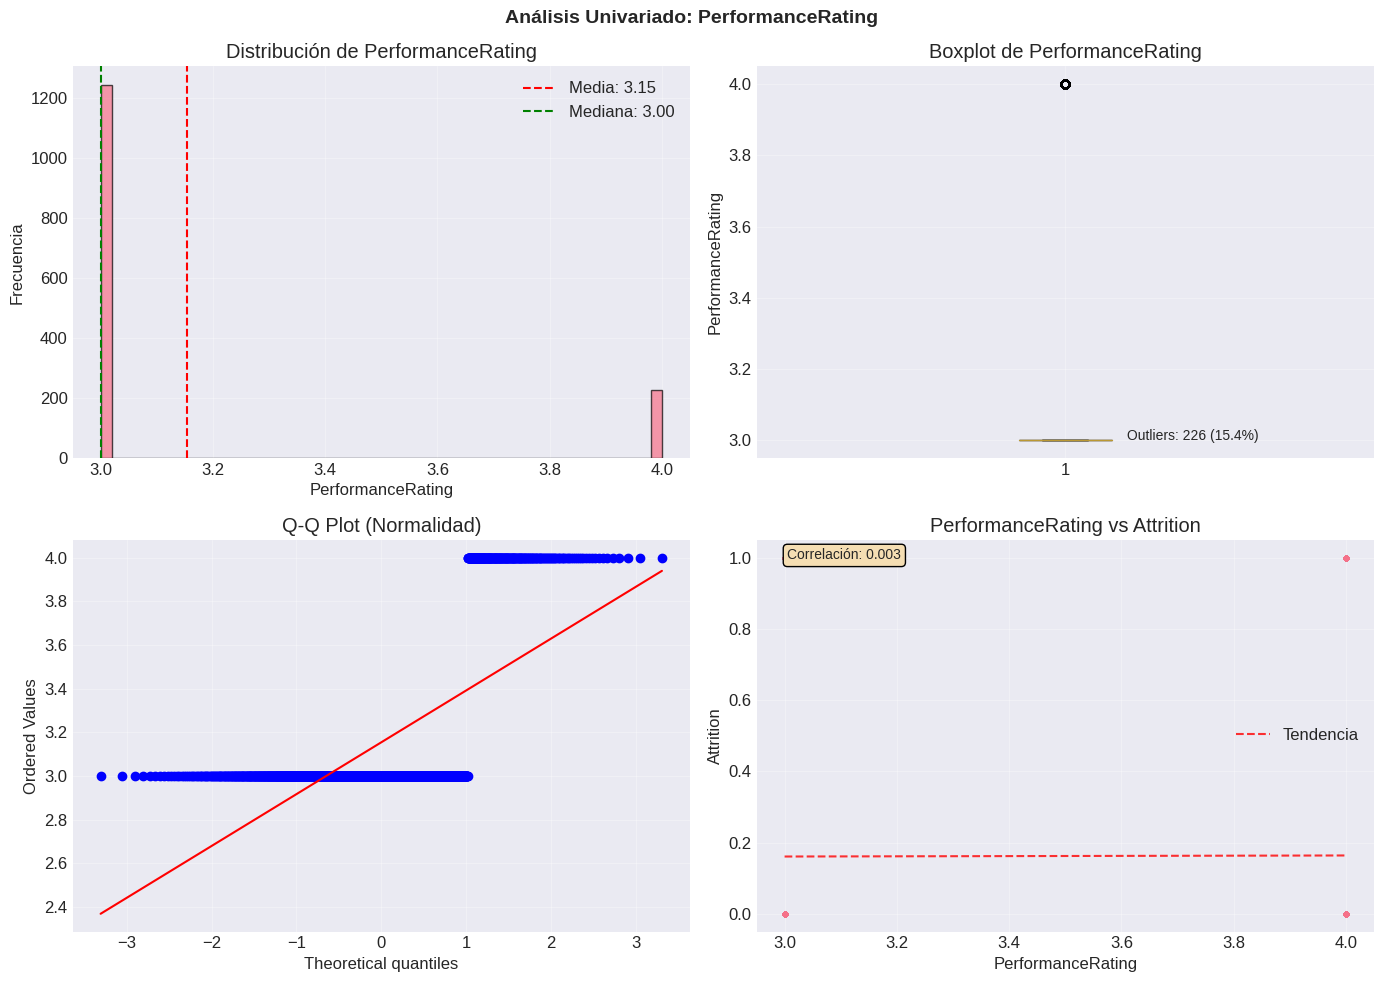

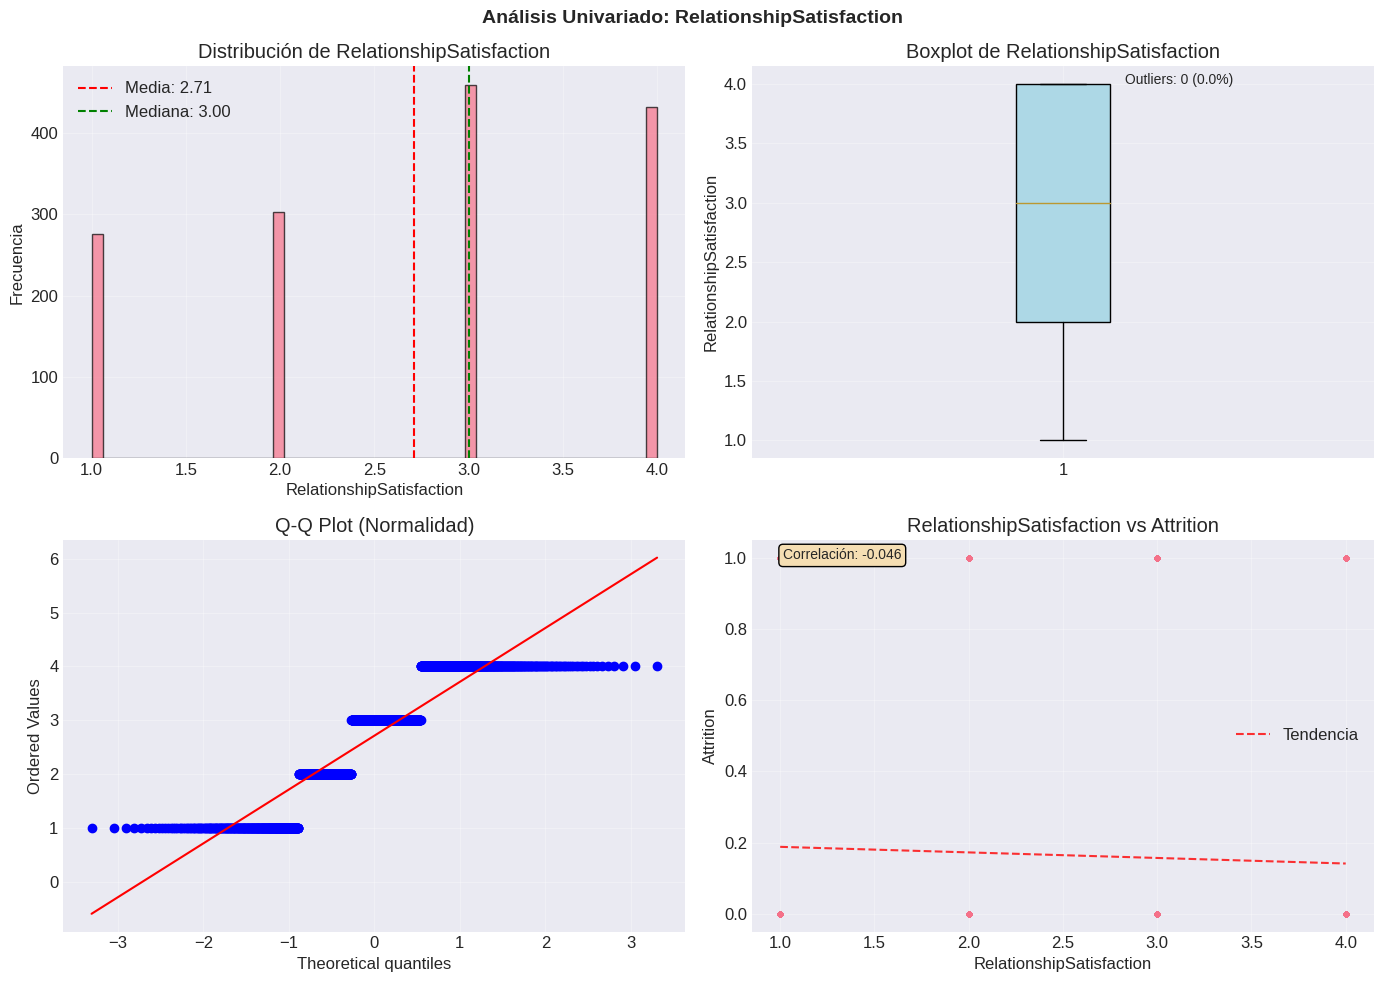

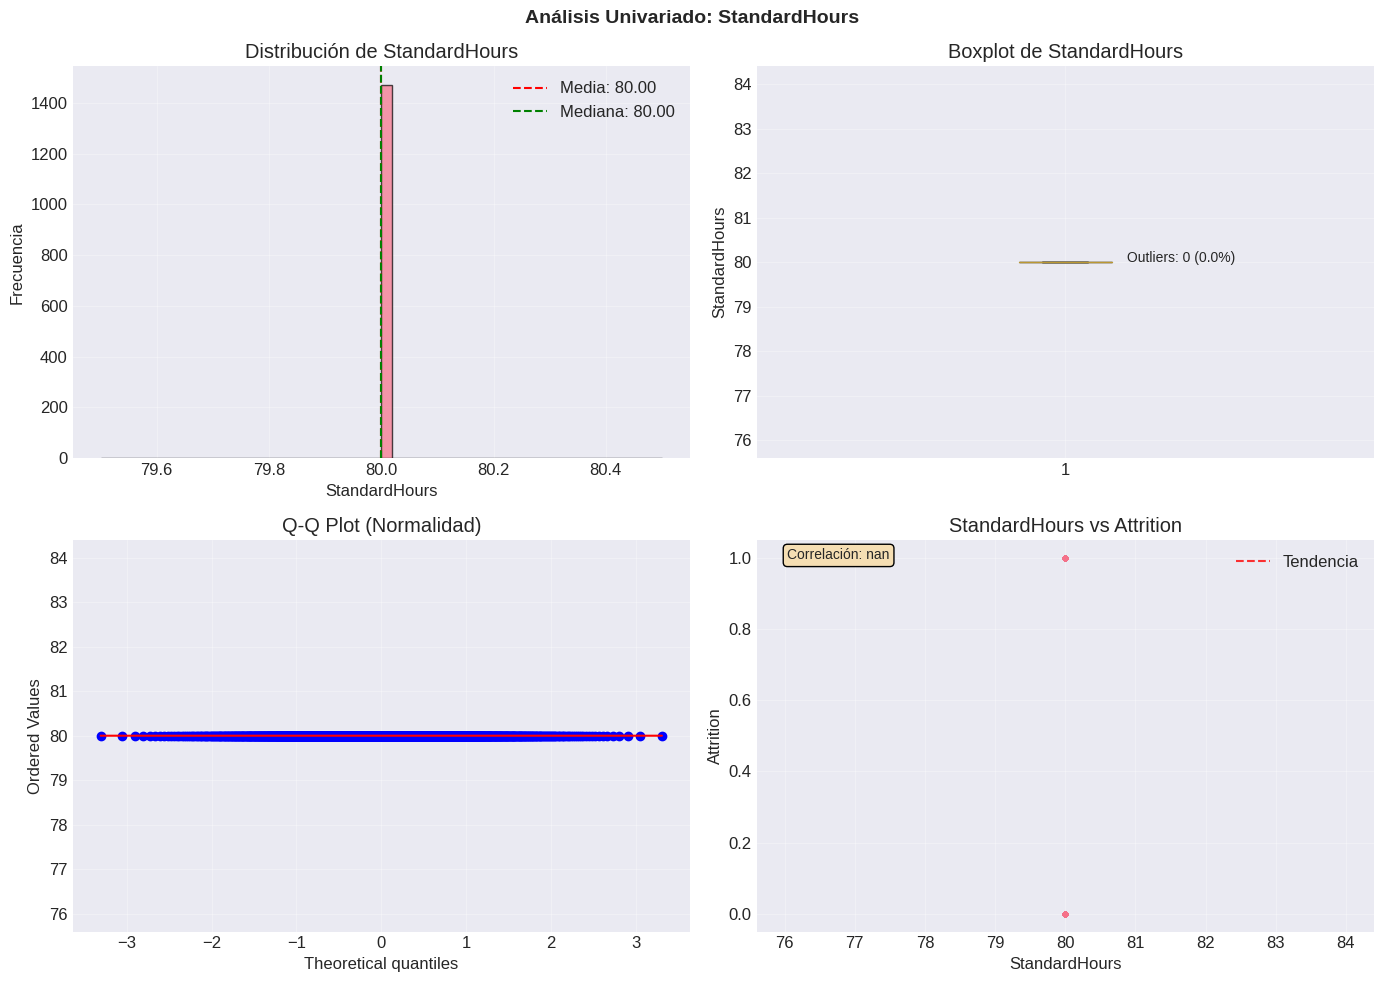

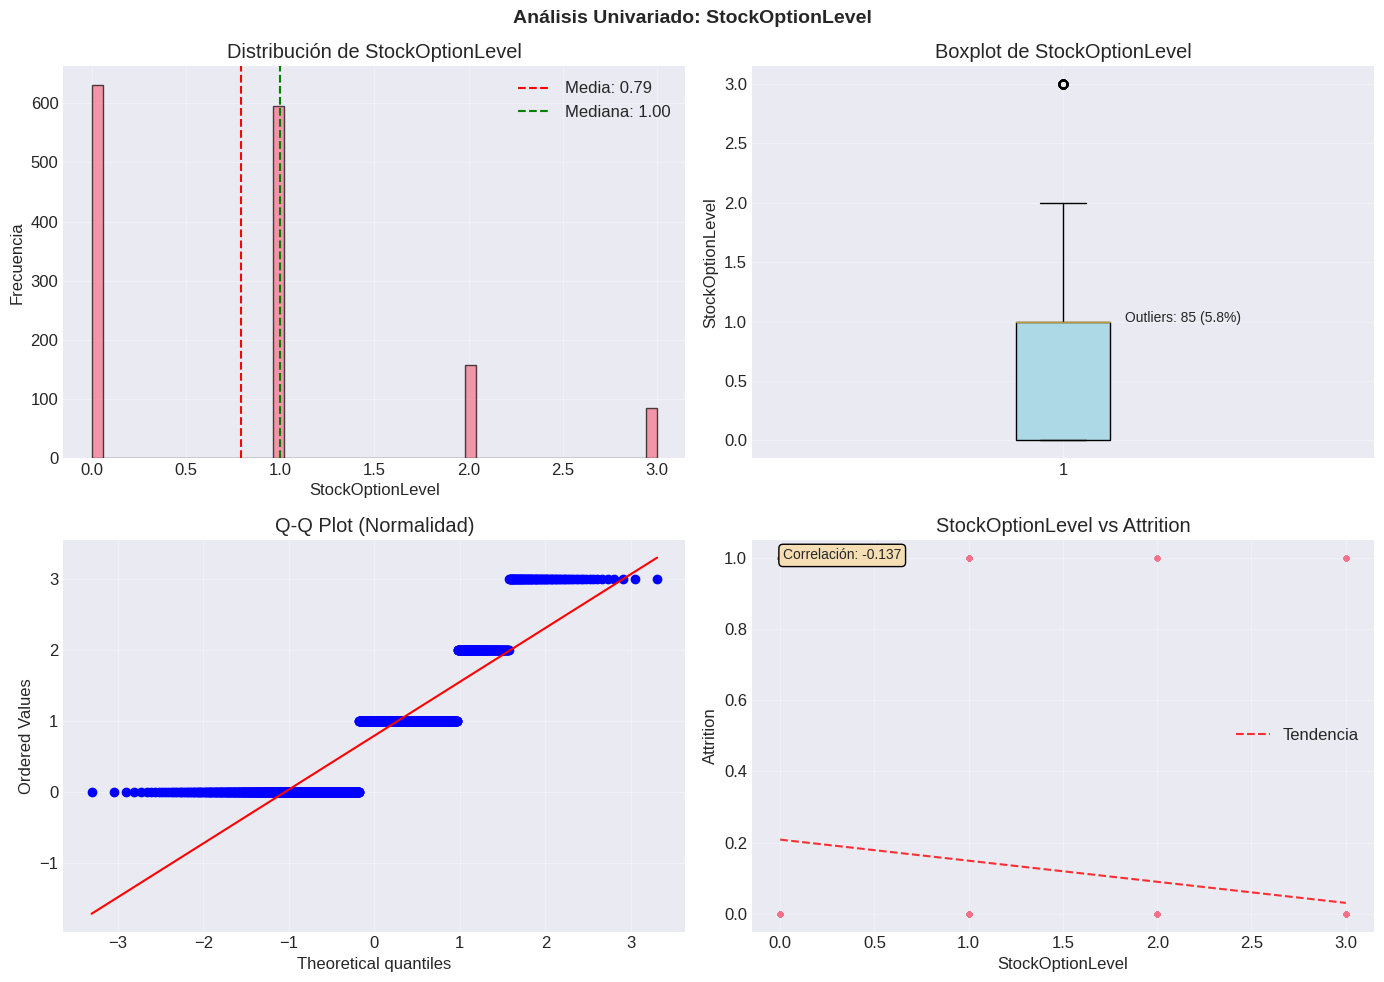

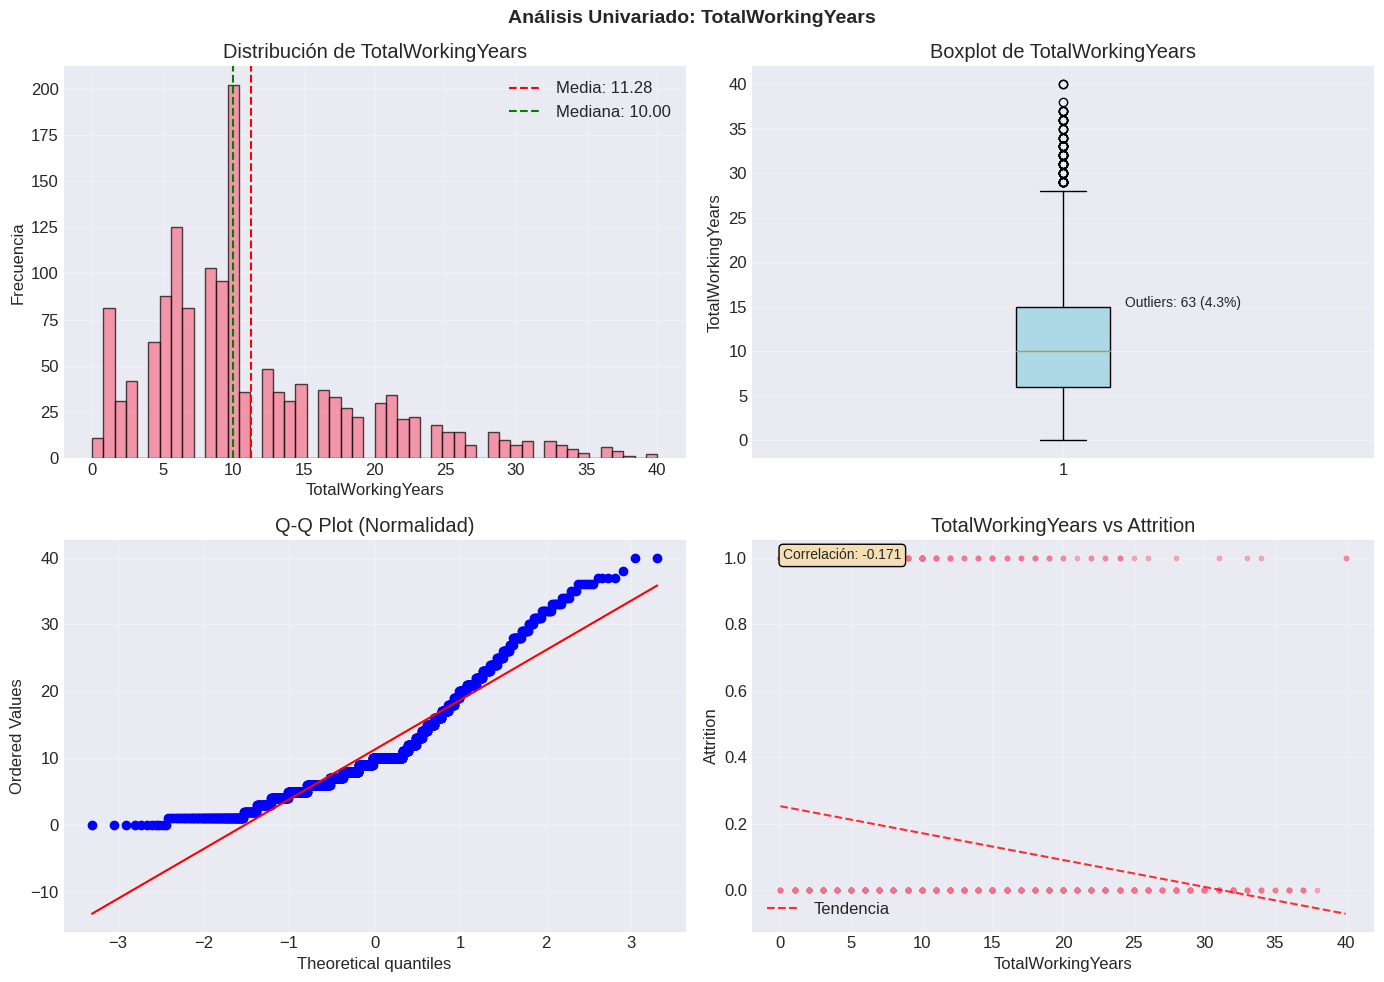

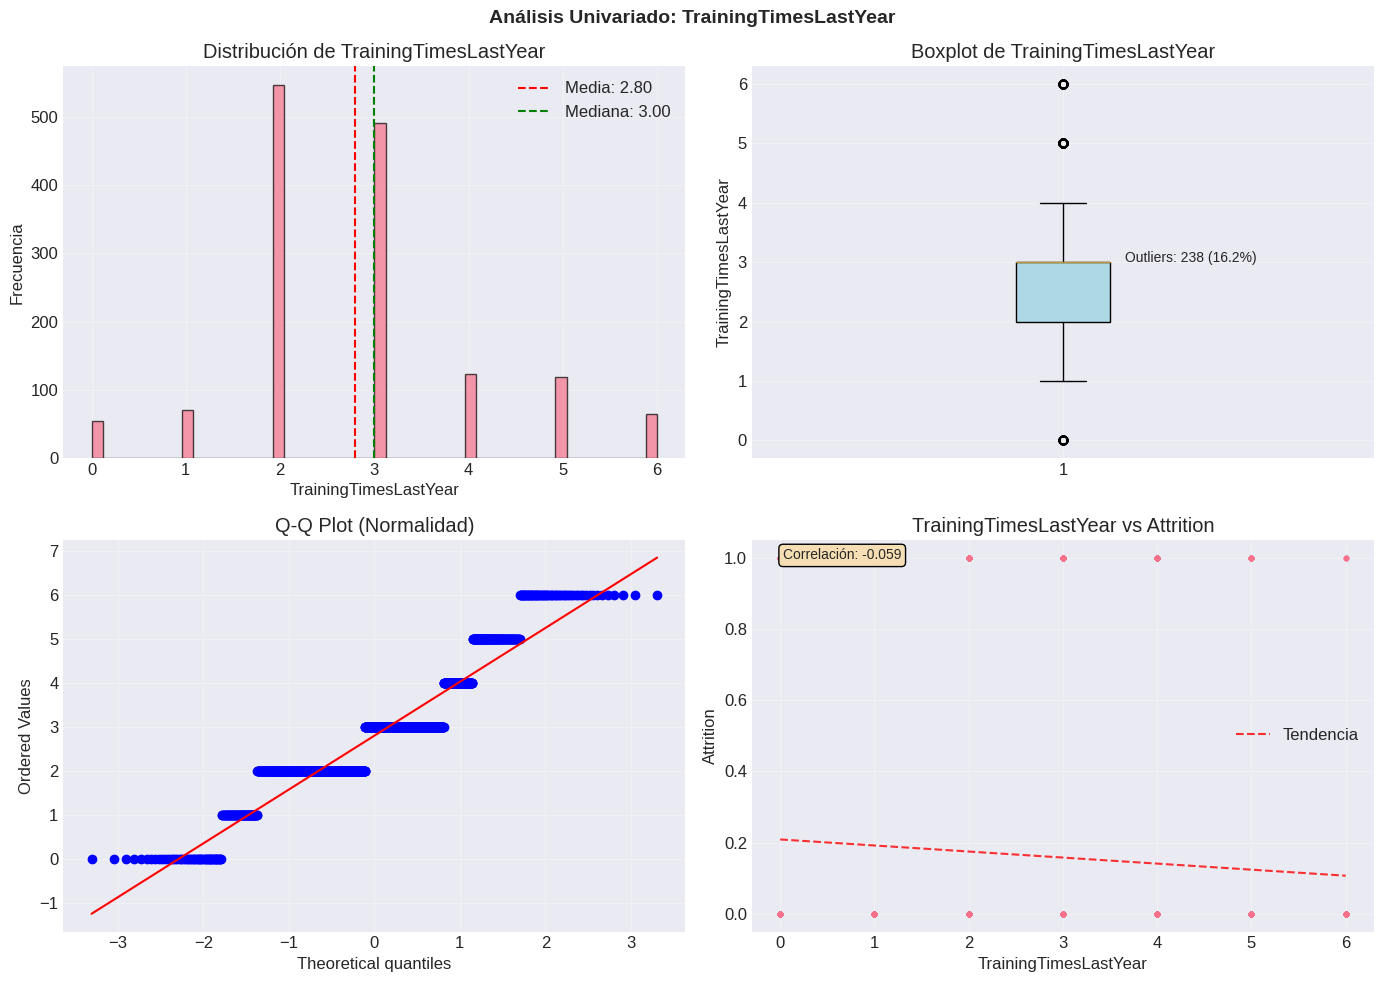

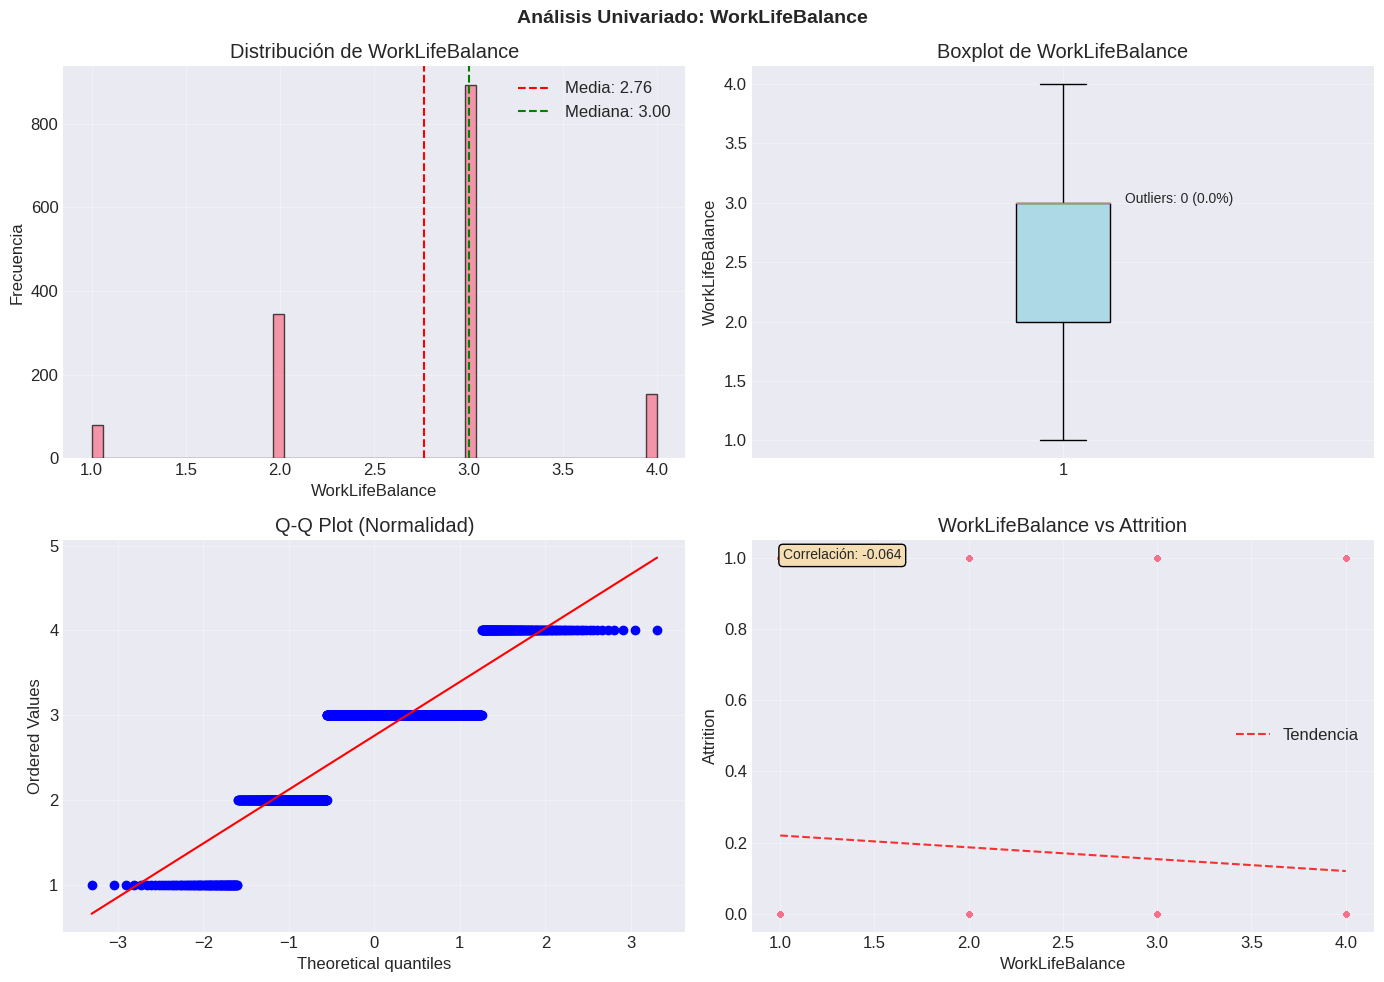

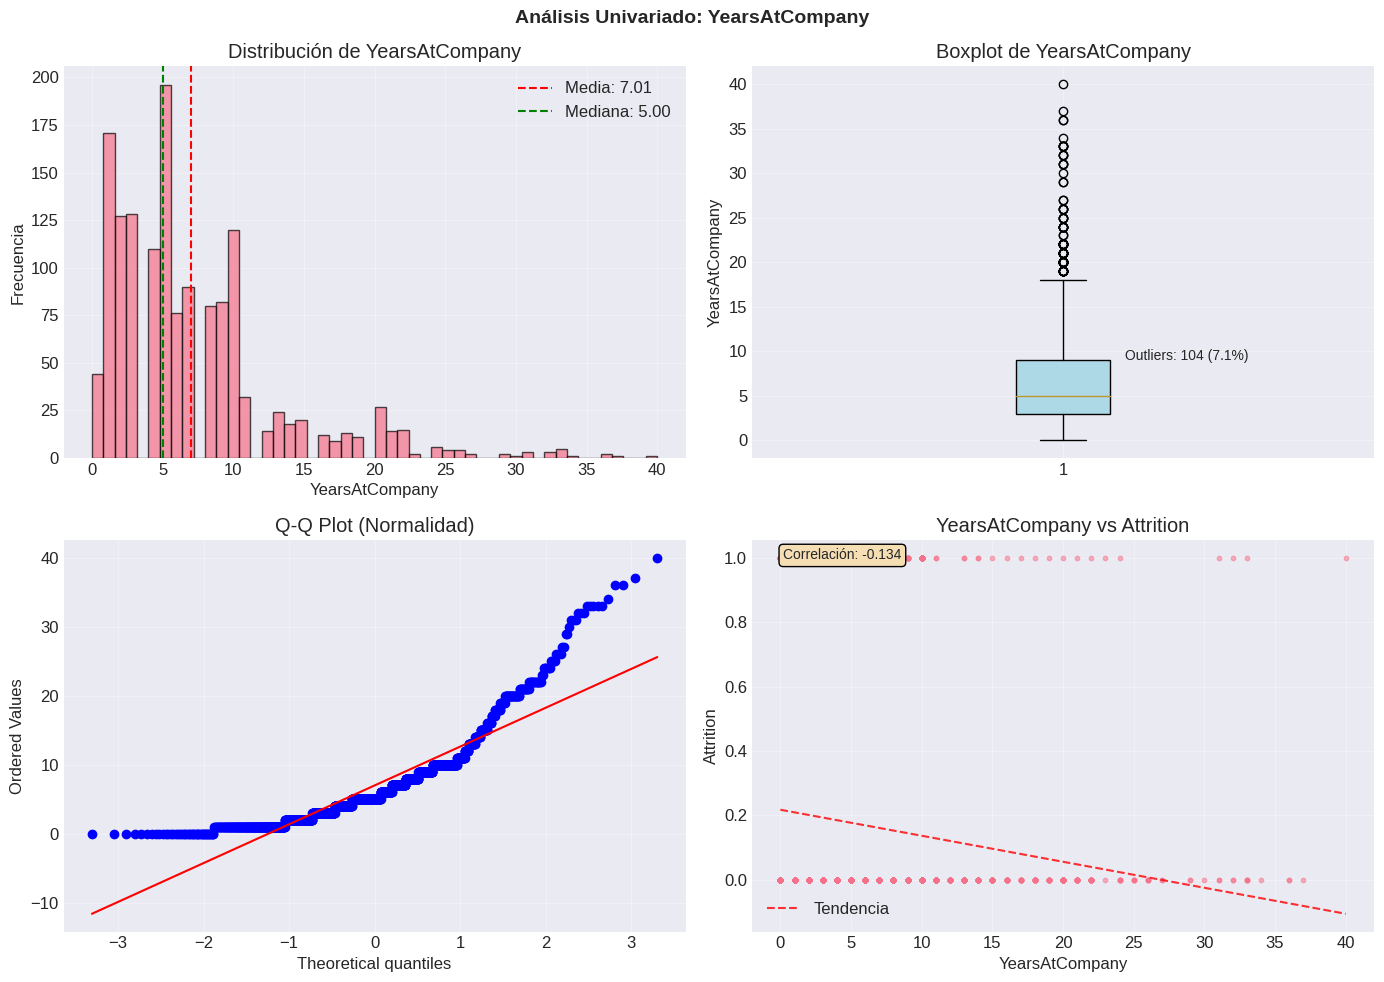

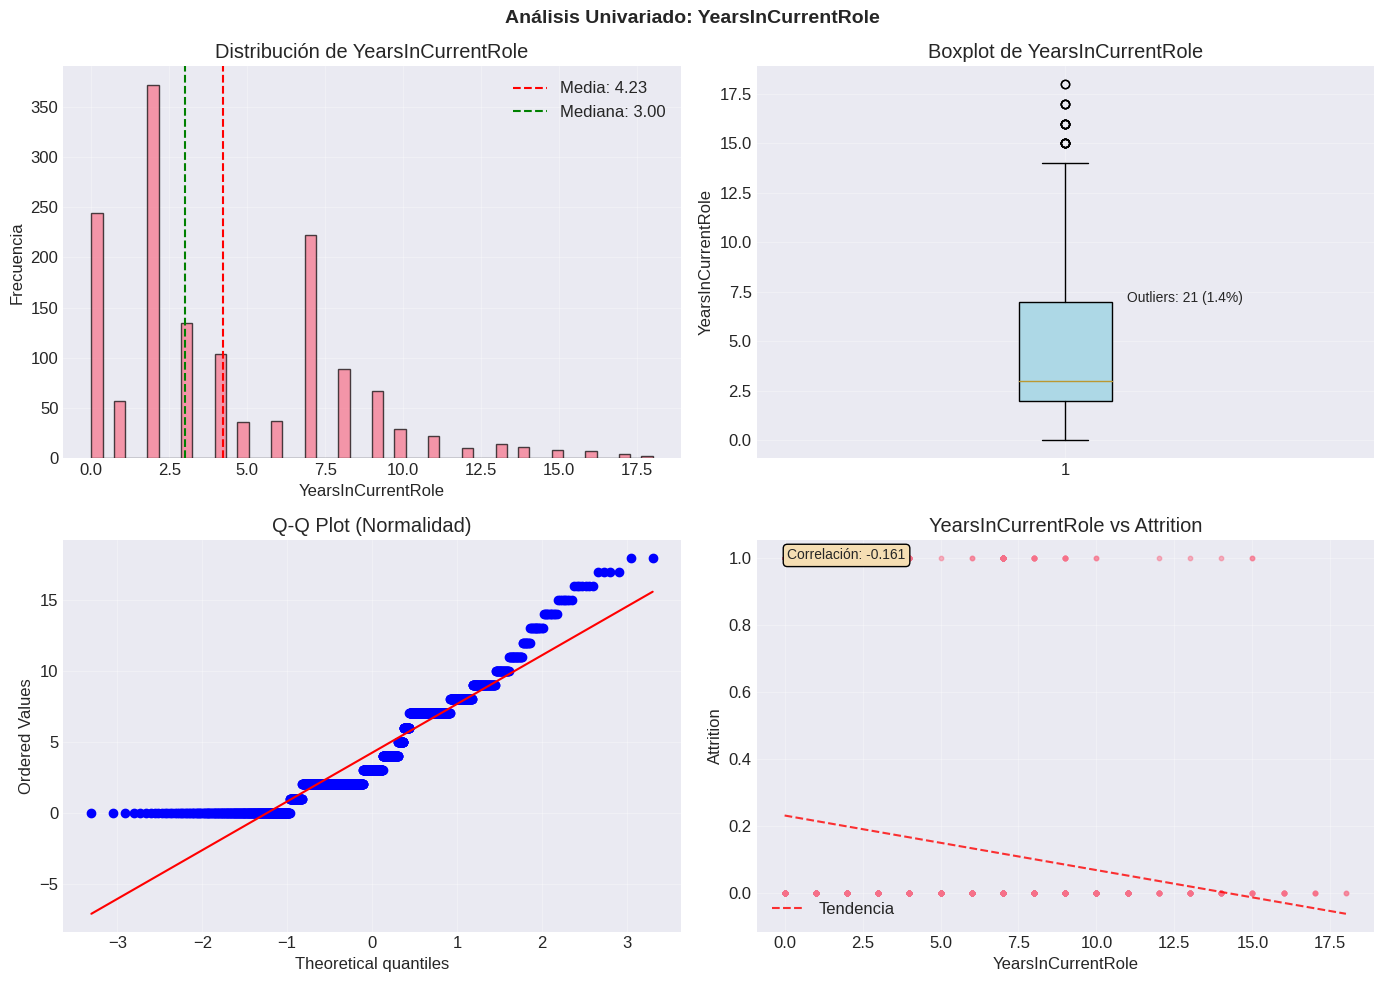

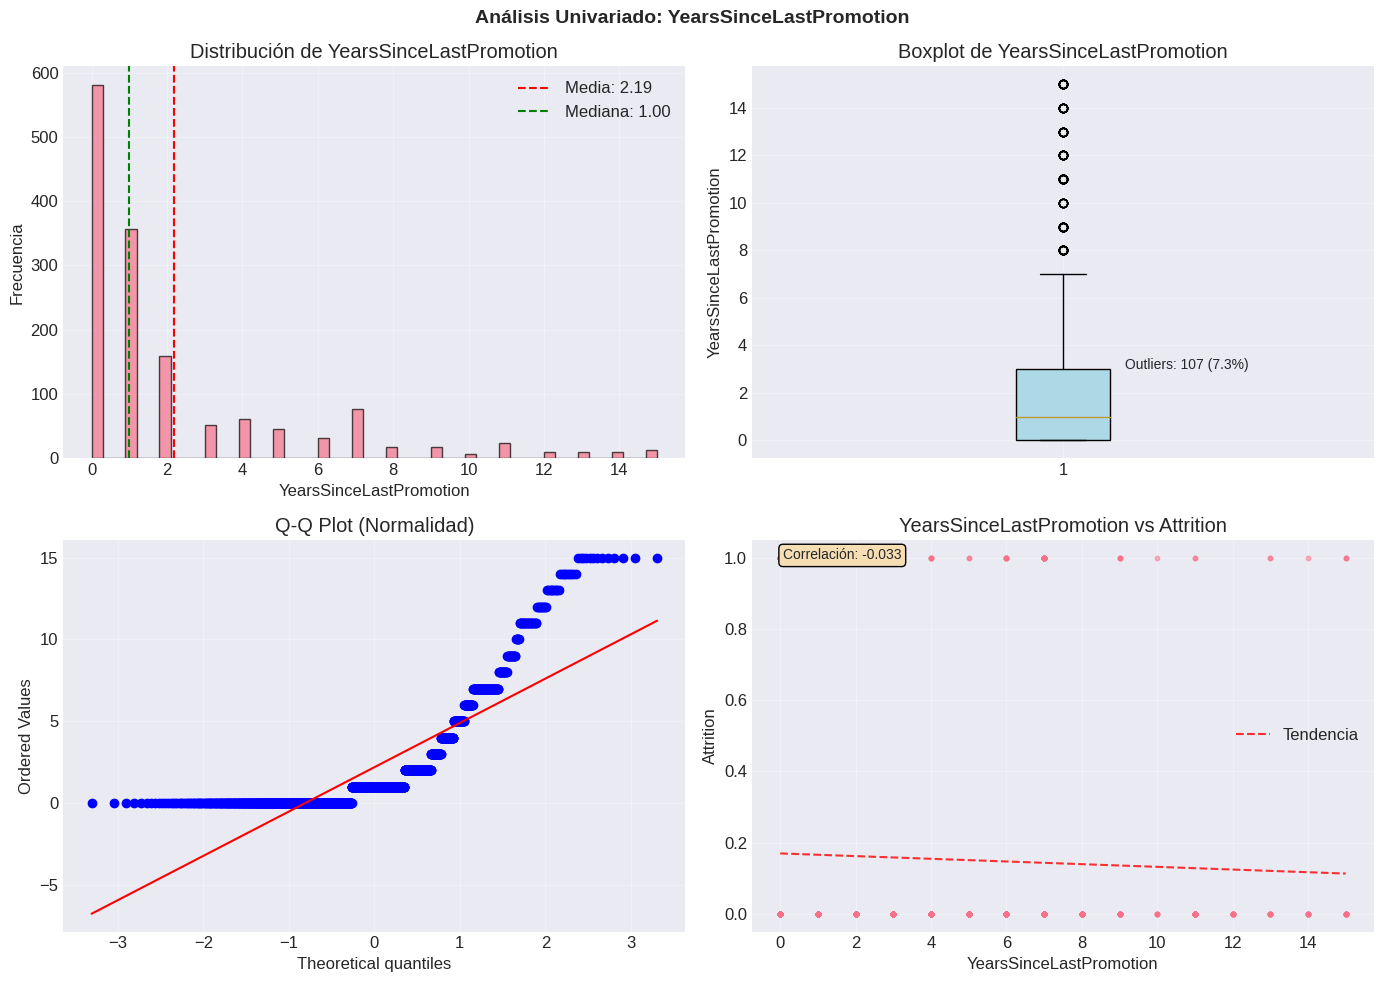

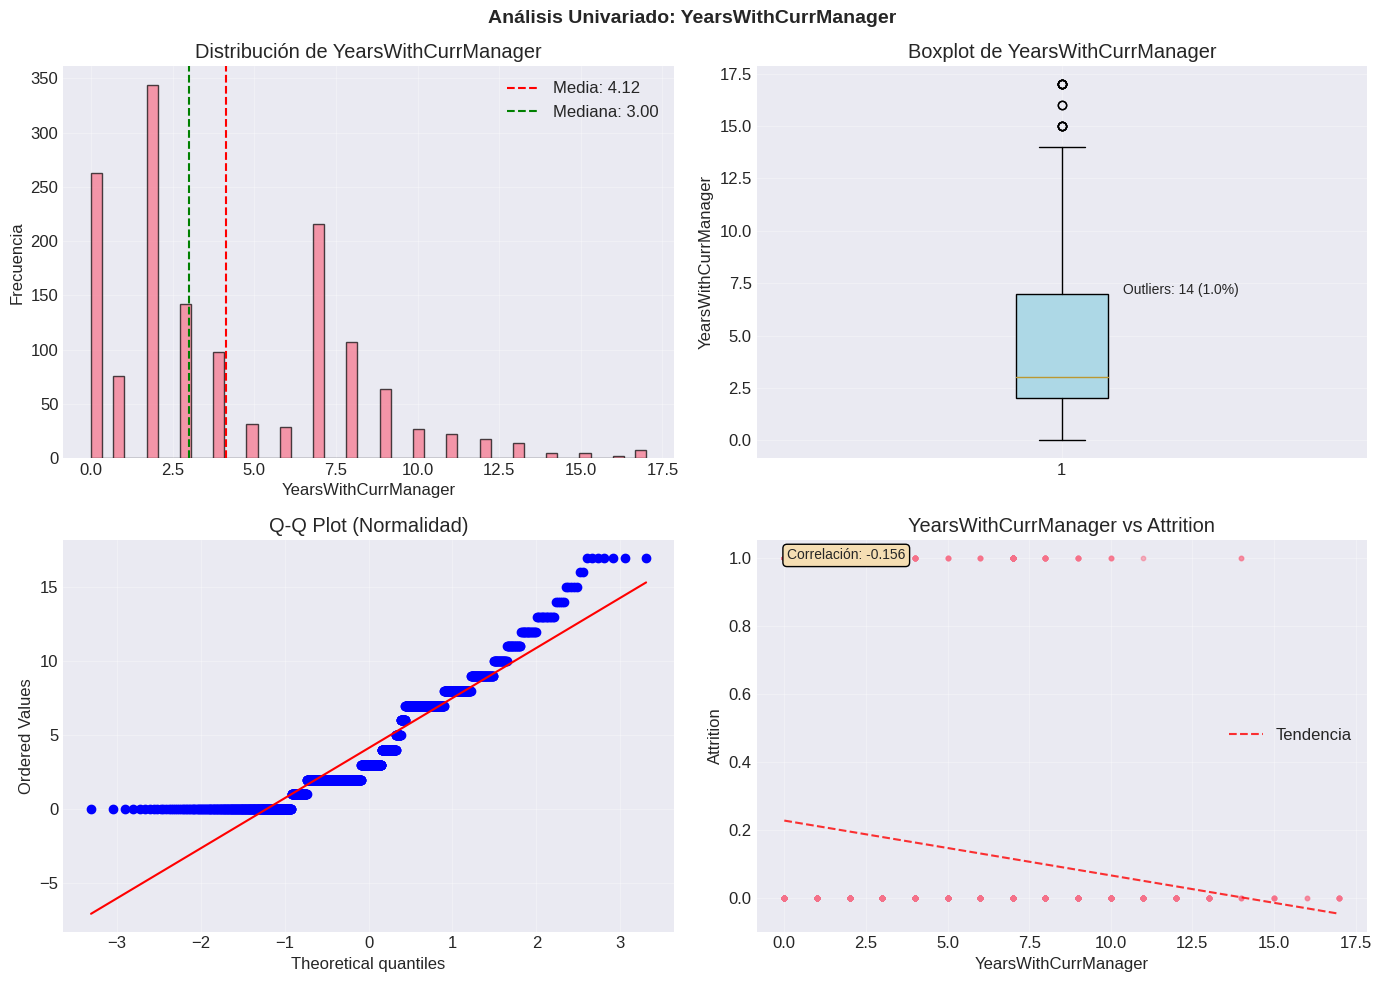

In [23]:
# Analizar variables numéricas clave y su relación con la variable de respuesta
for col in numeric_cols:
    ut.univariate_analysis(data, col, feat_target)

### Analizar variables categóricas

En este análisis se agregan algunas variables que, si bien son numéricas como tipo de dato, tienen un comportamiento categórico (discreto) por naturaleza. Es conveniente analizarlas desde este punto de vista para una adecuada comprensión de las mismas.  

In [27]:
list(categorical_cols)

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

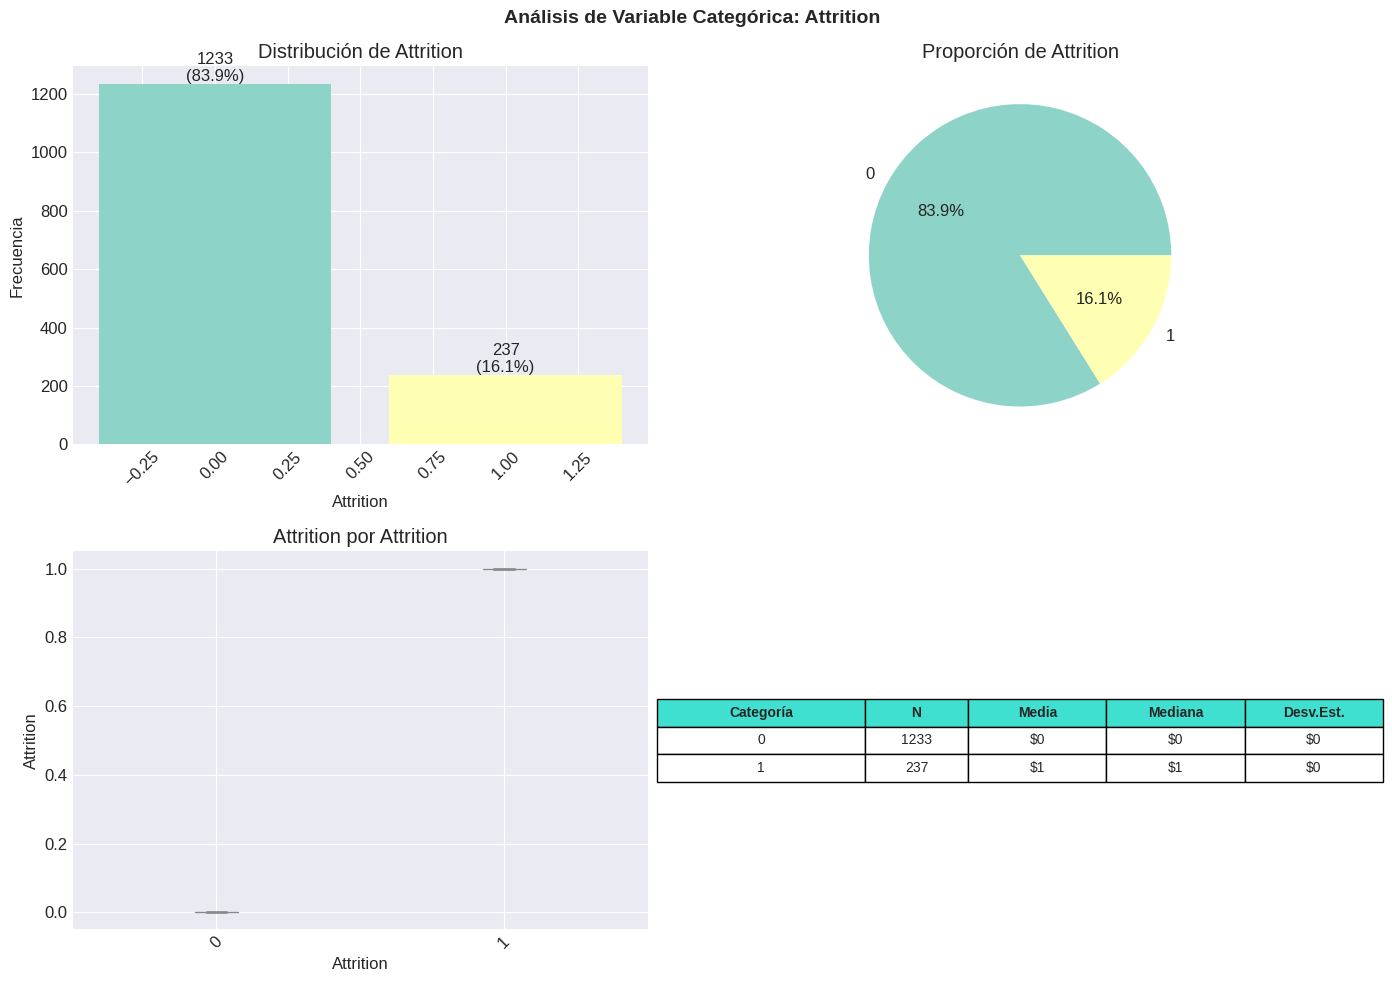

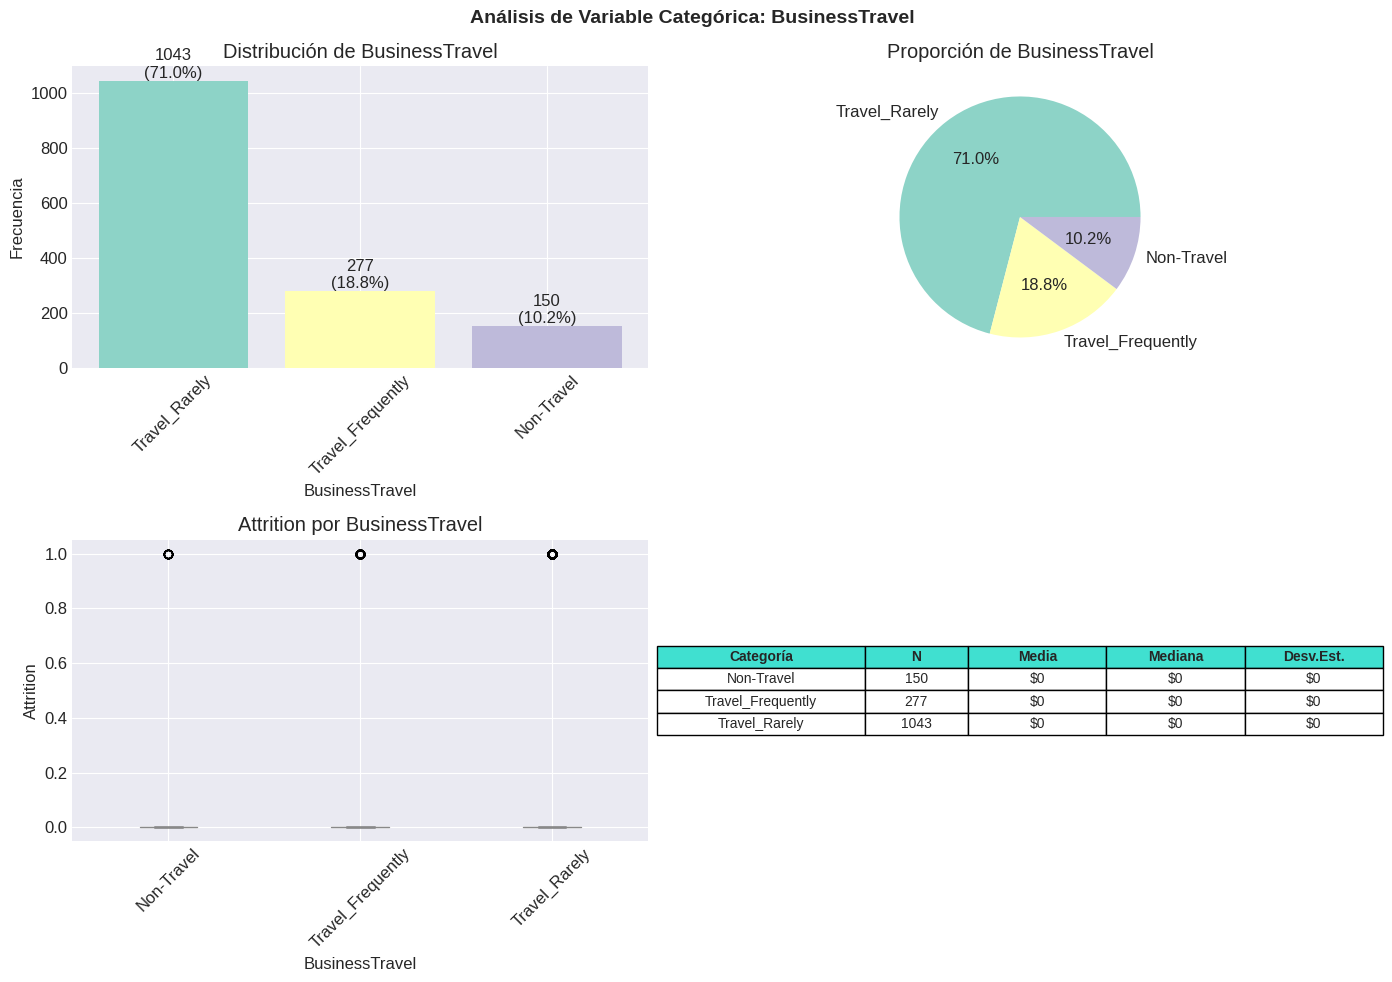

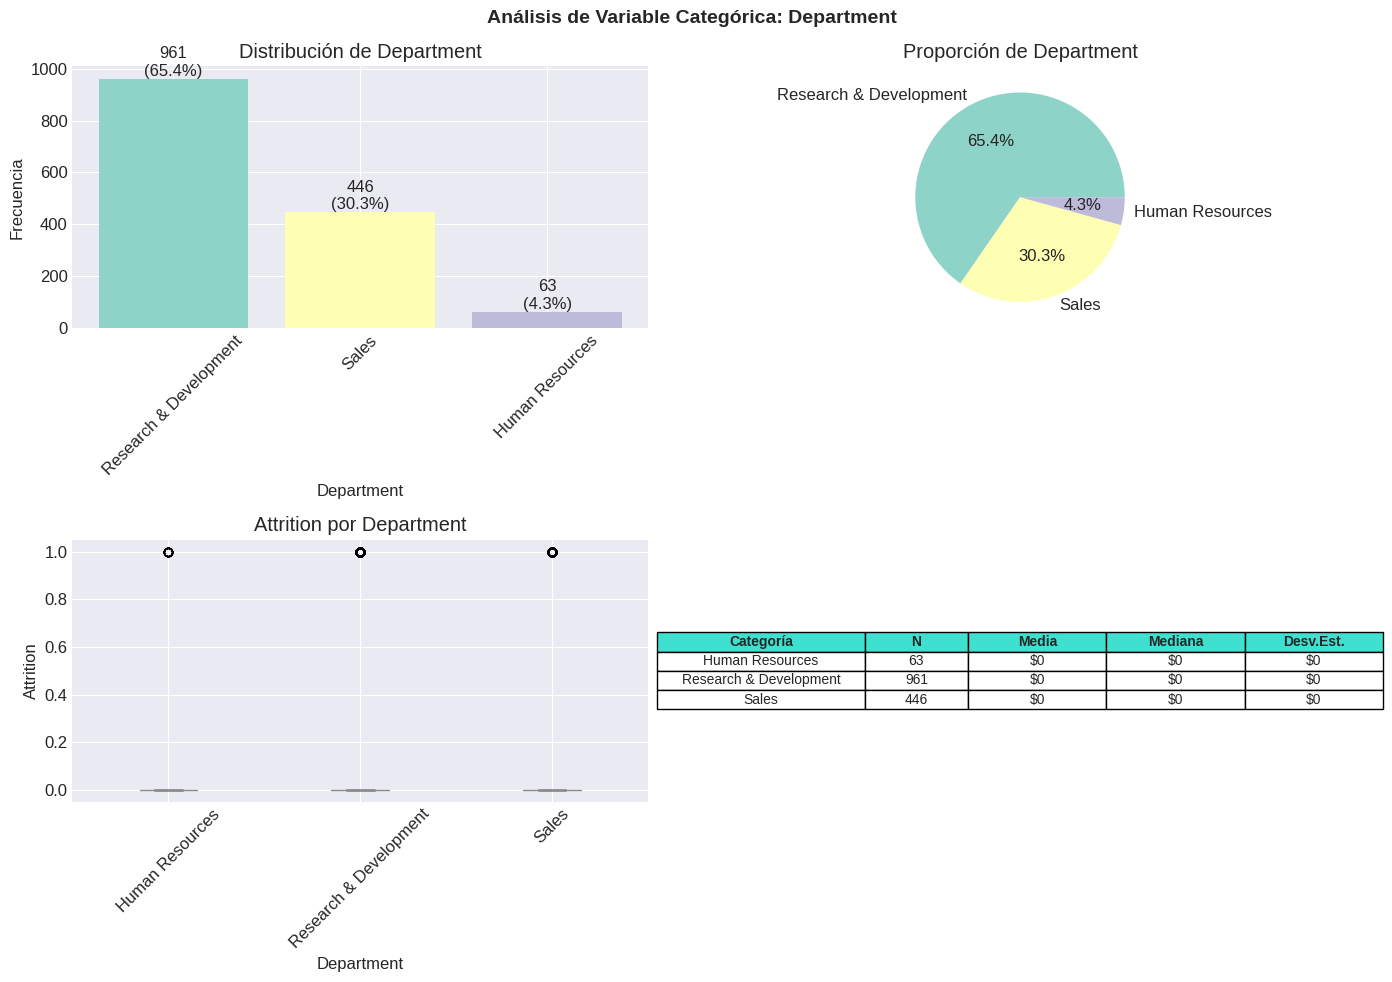

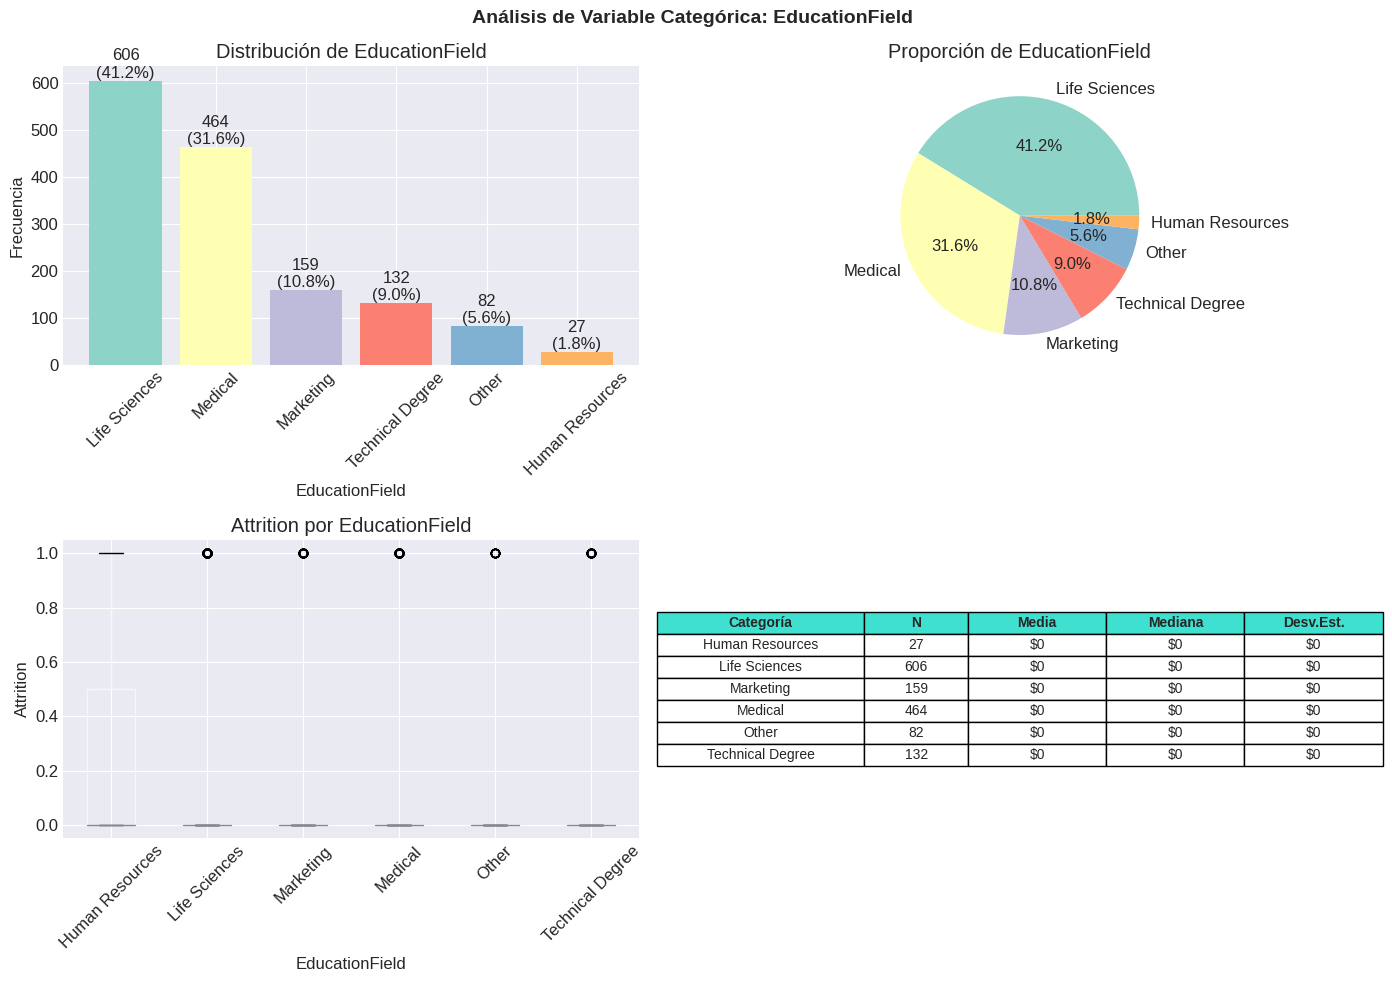

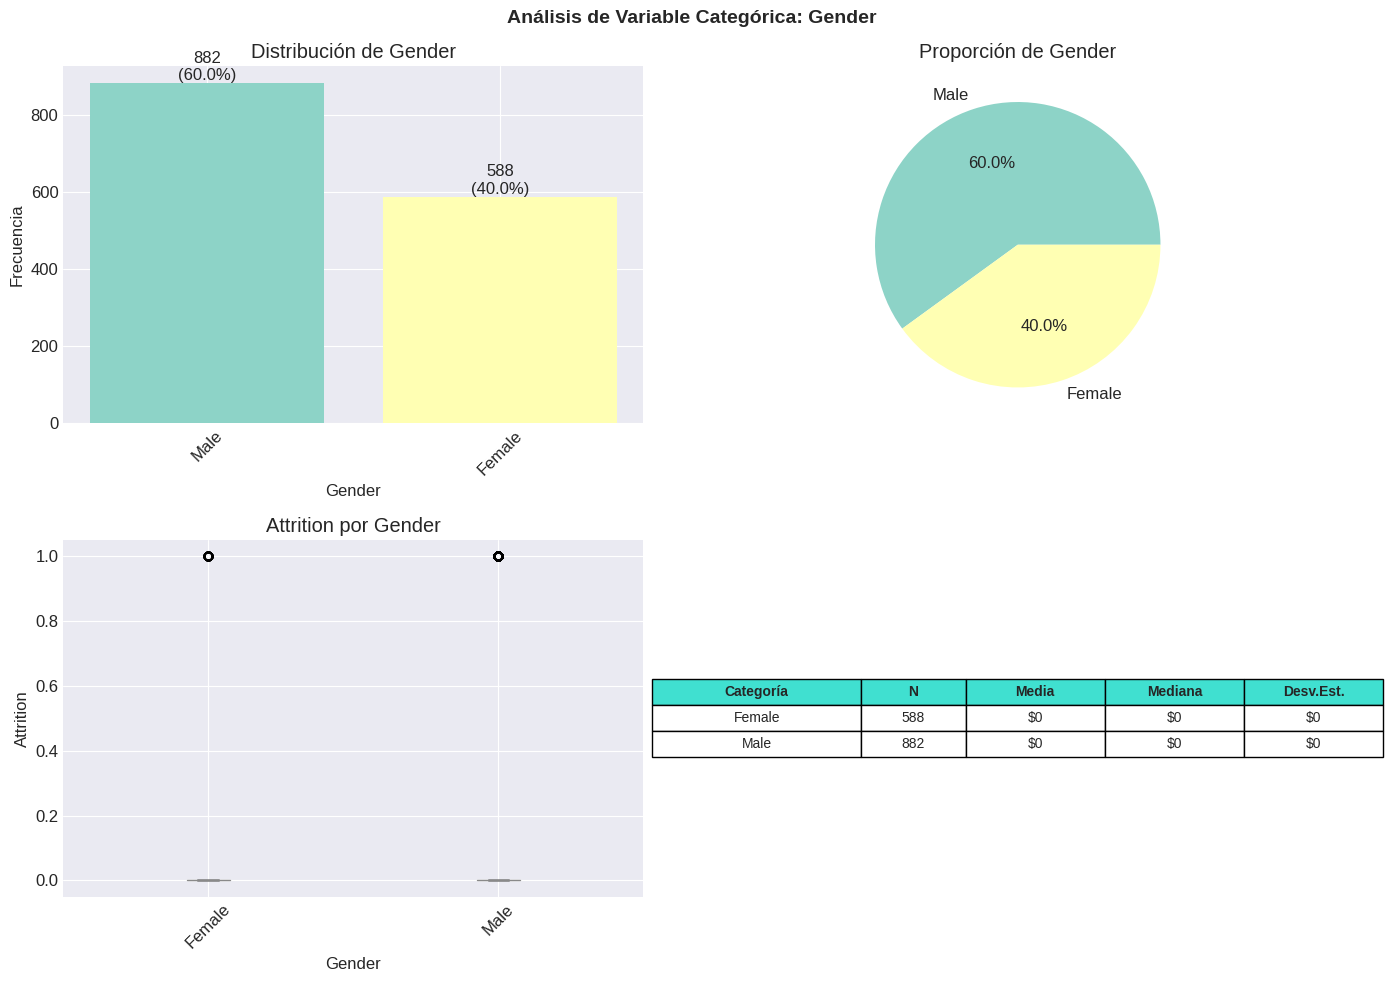

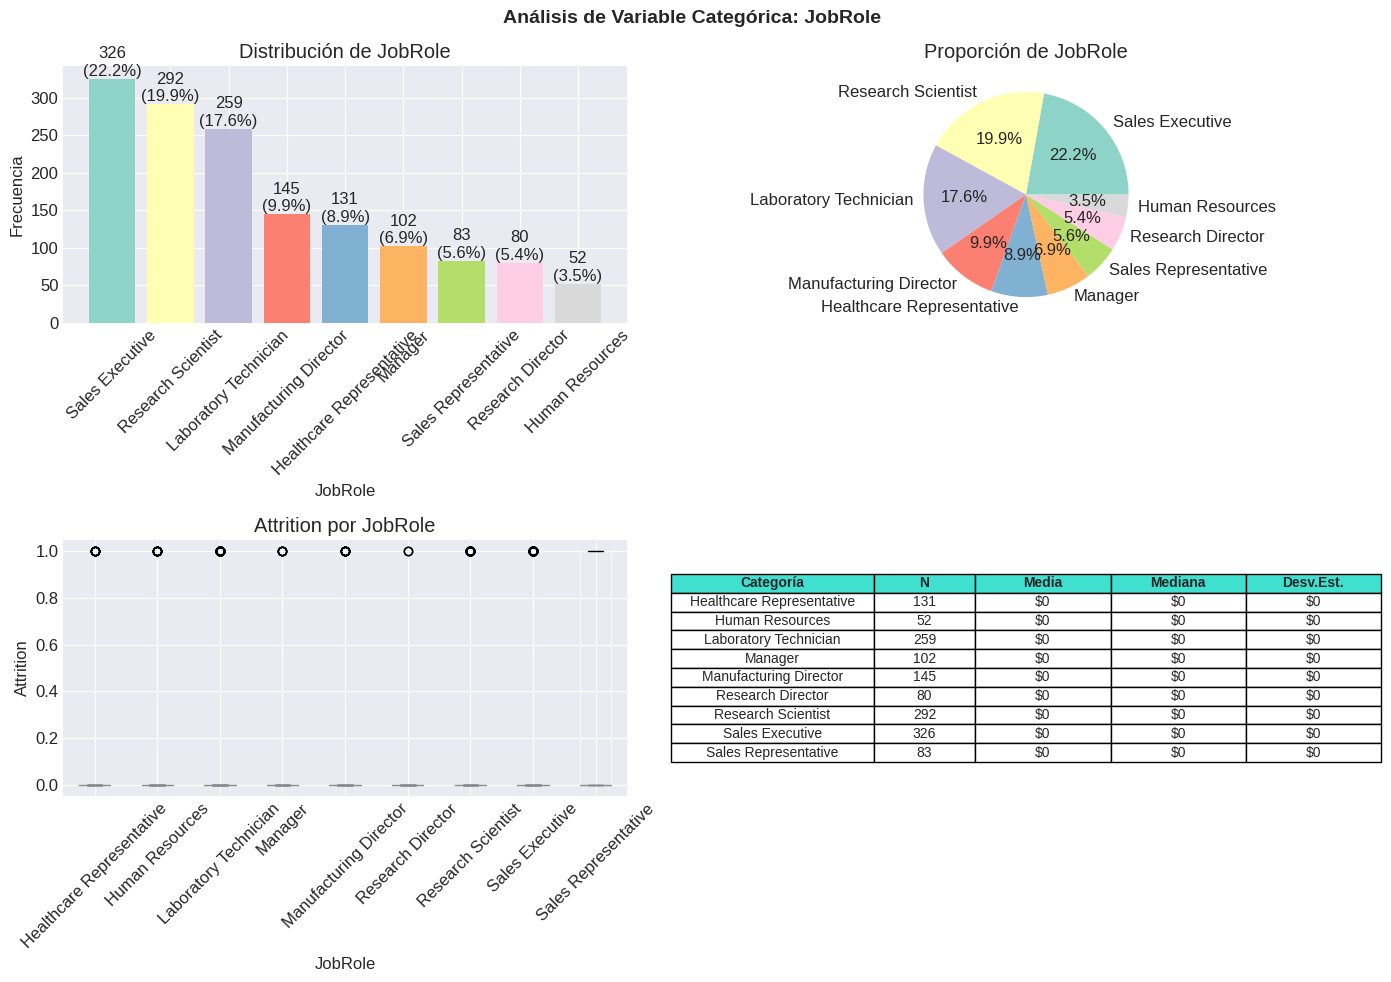

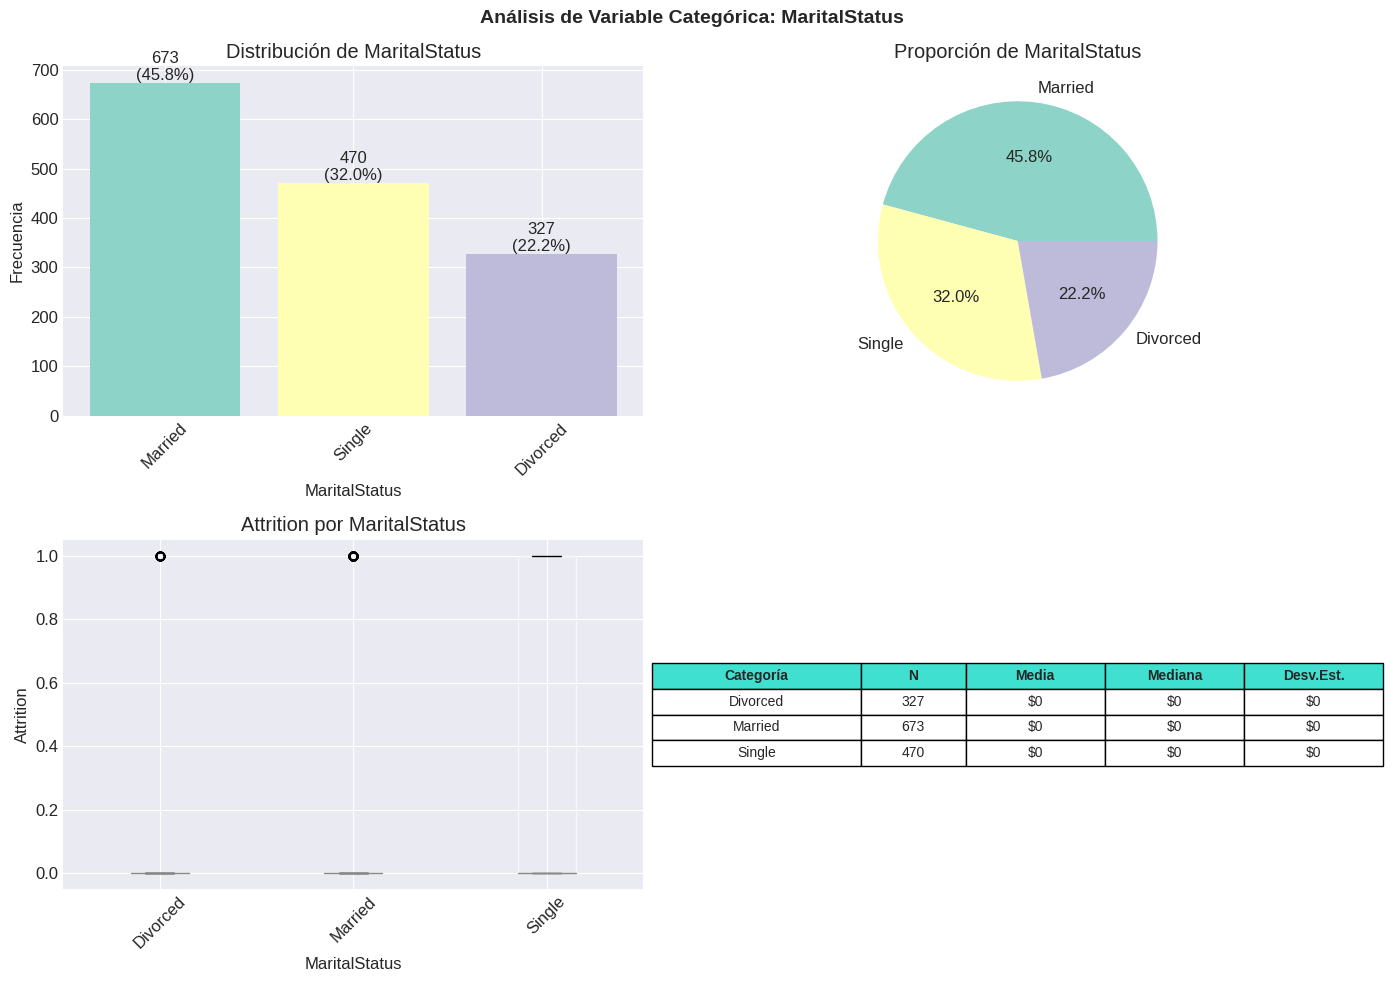

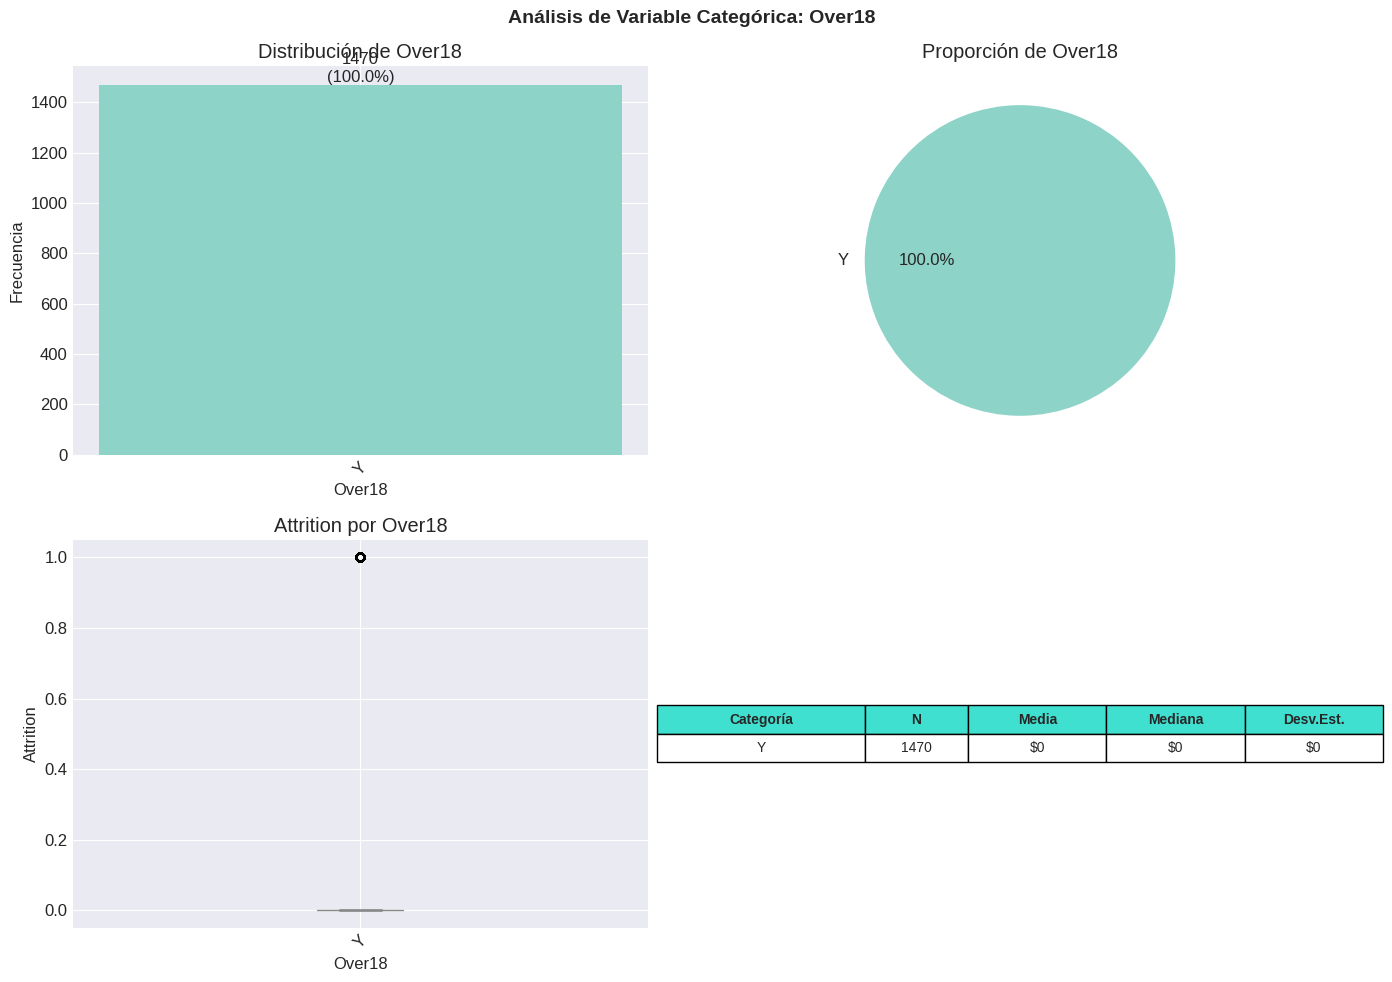

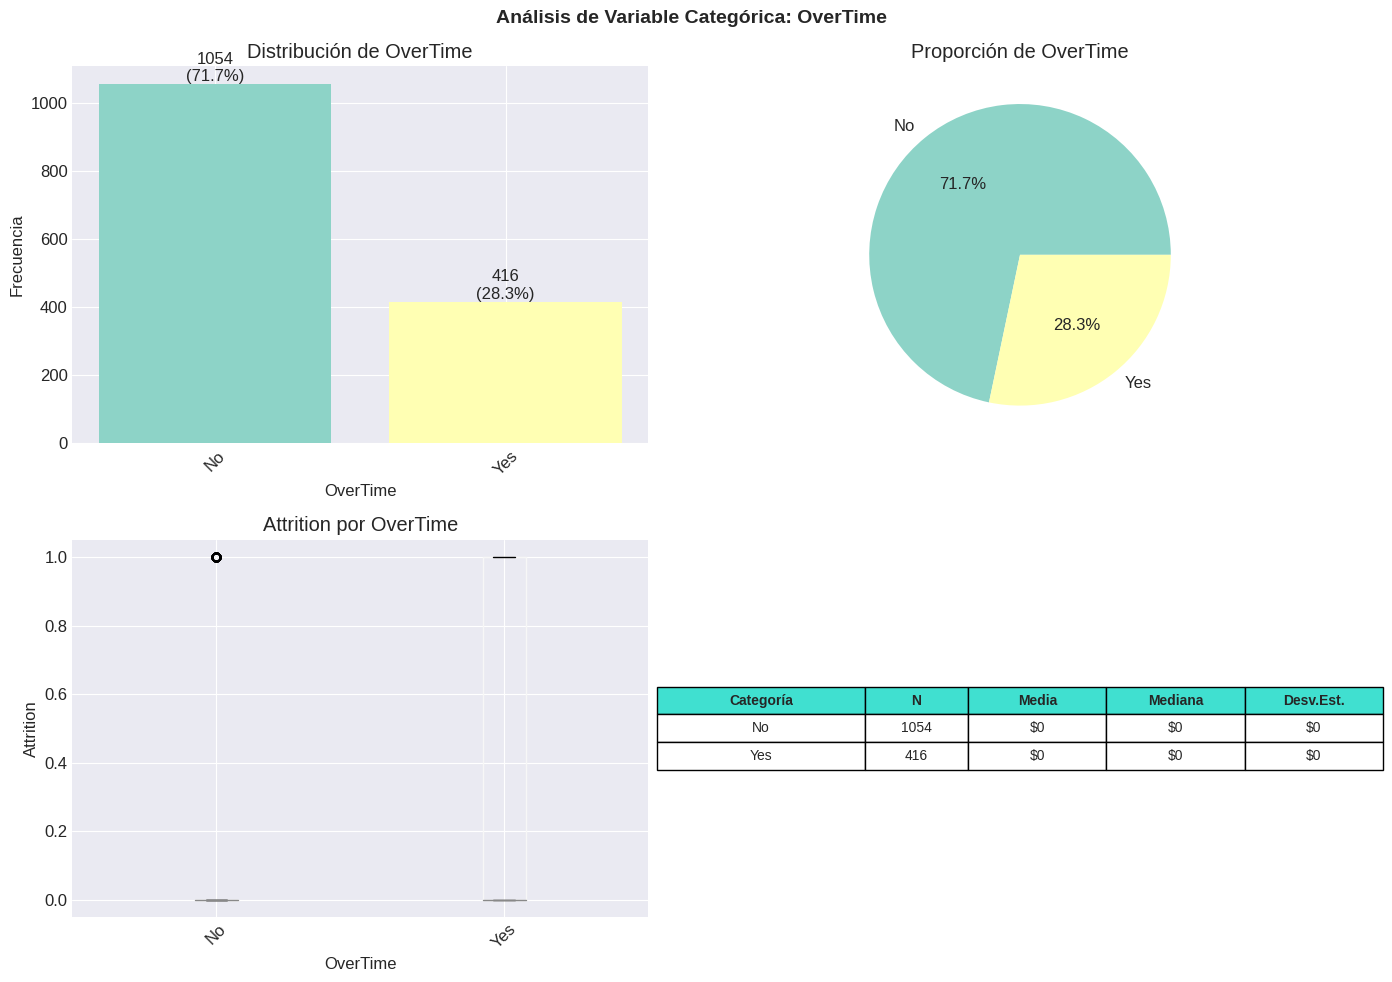

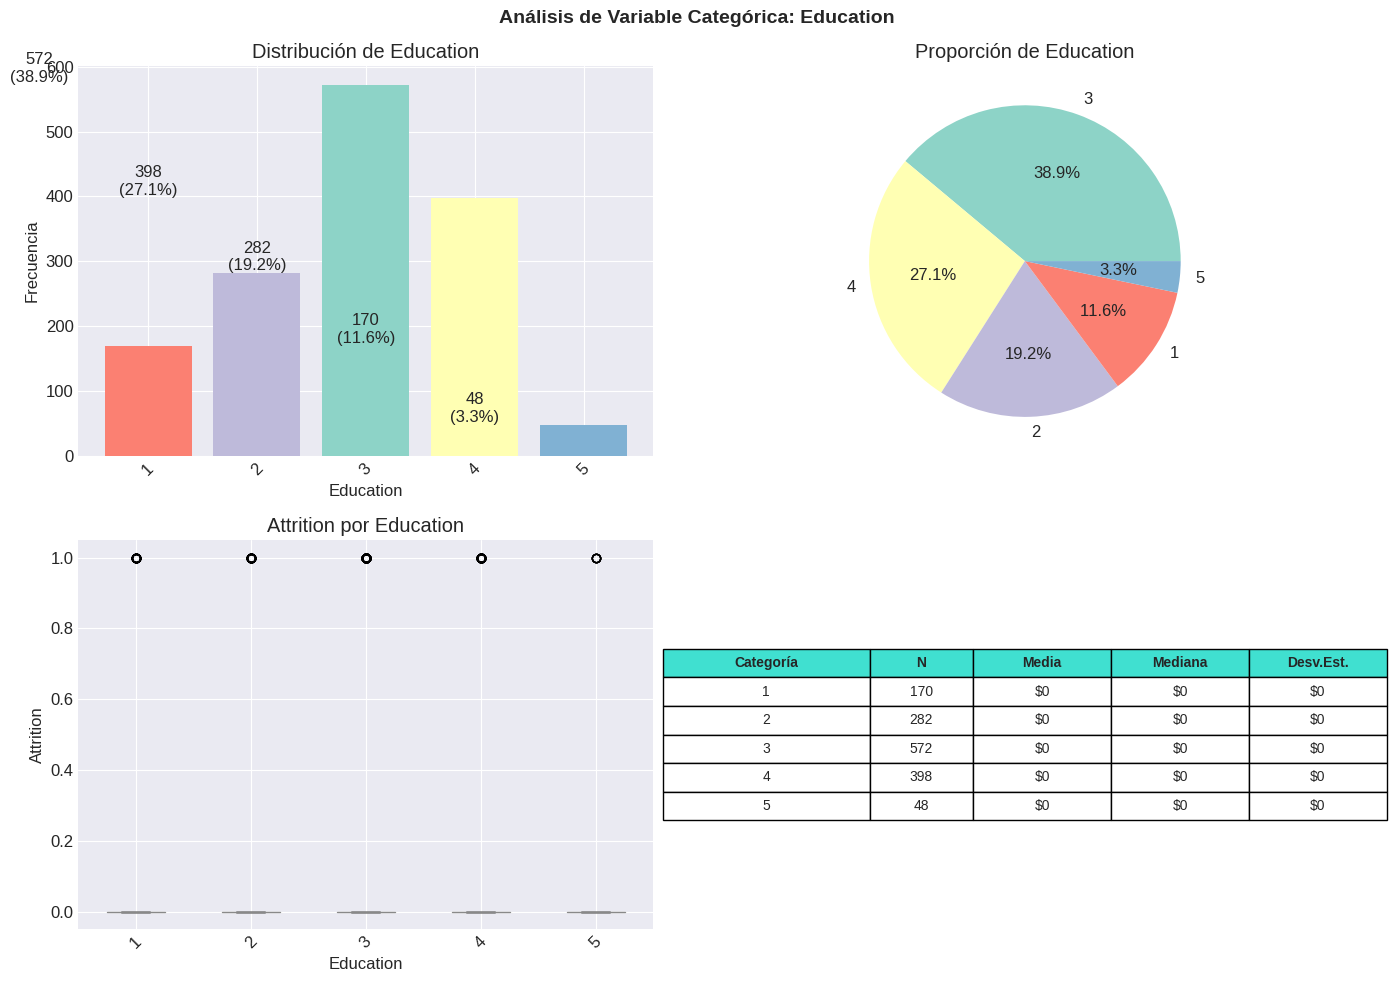

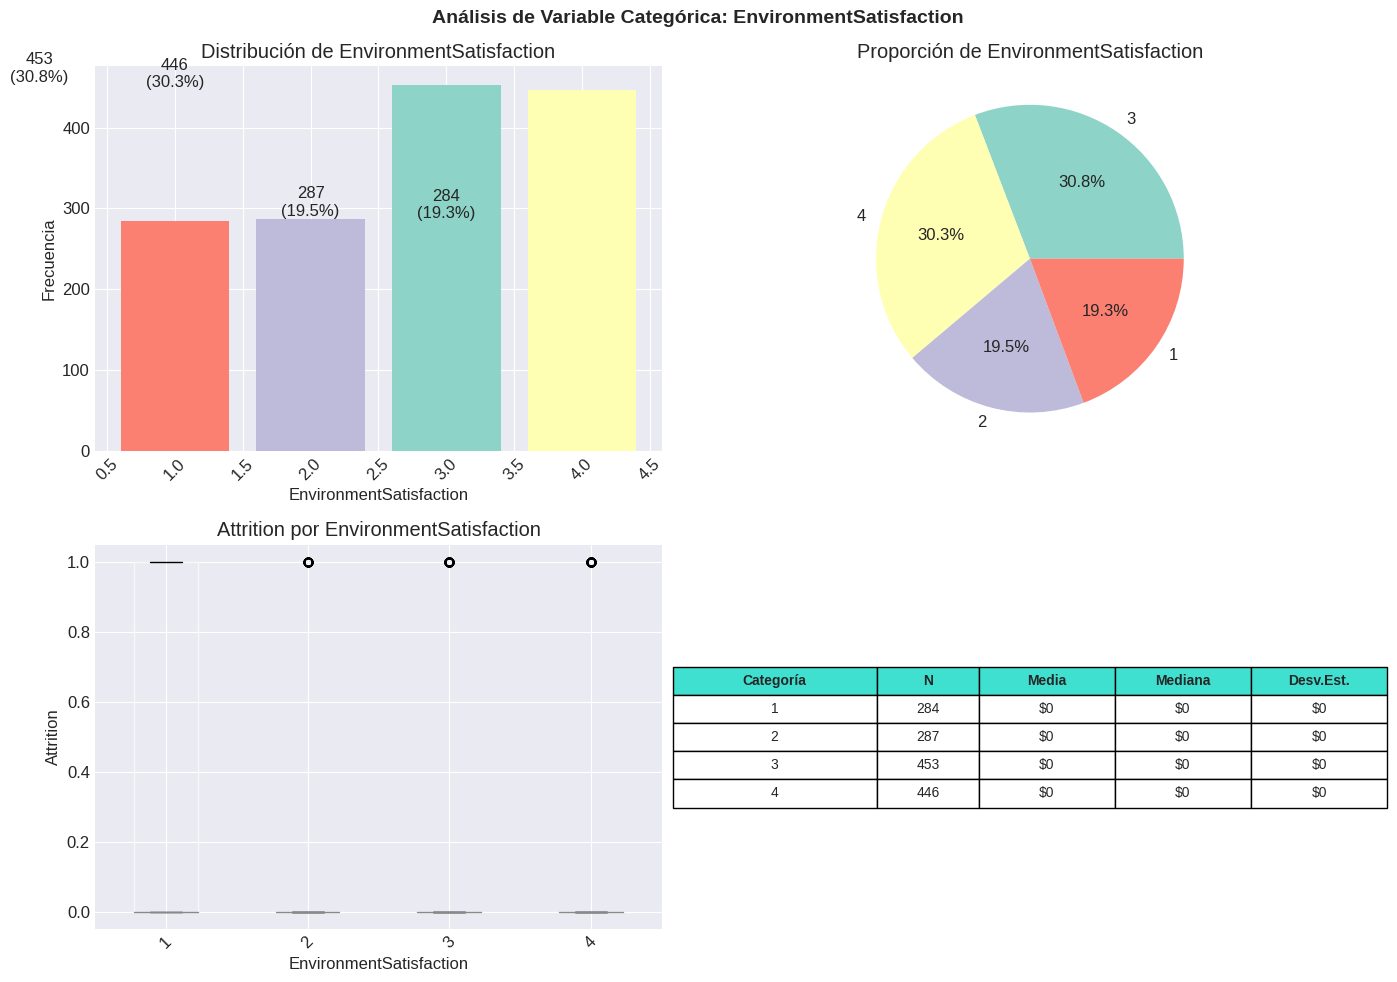

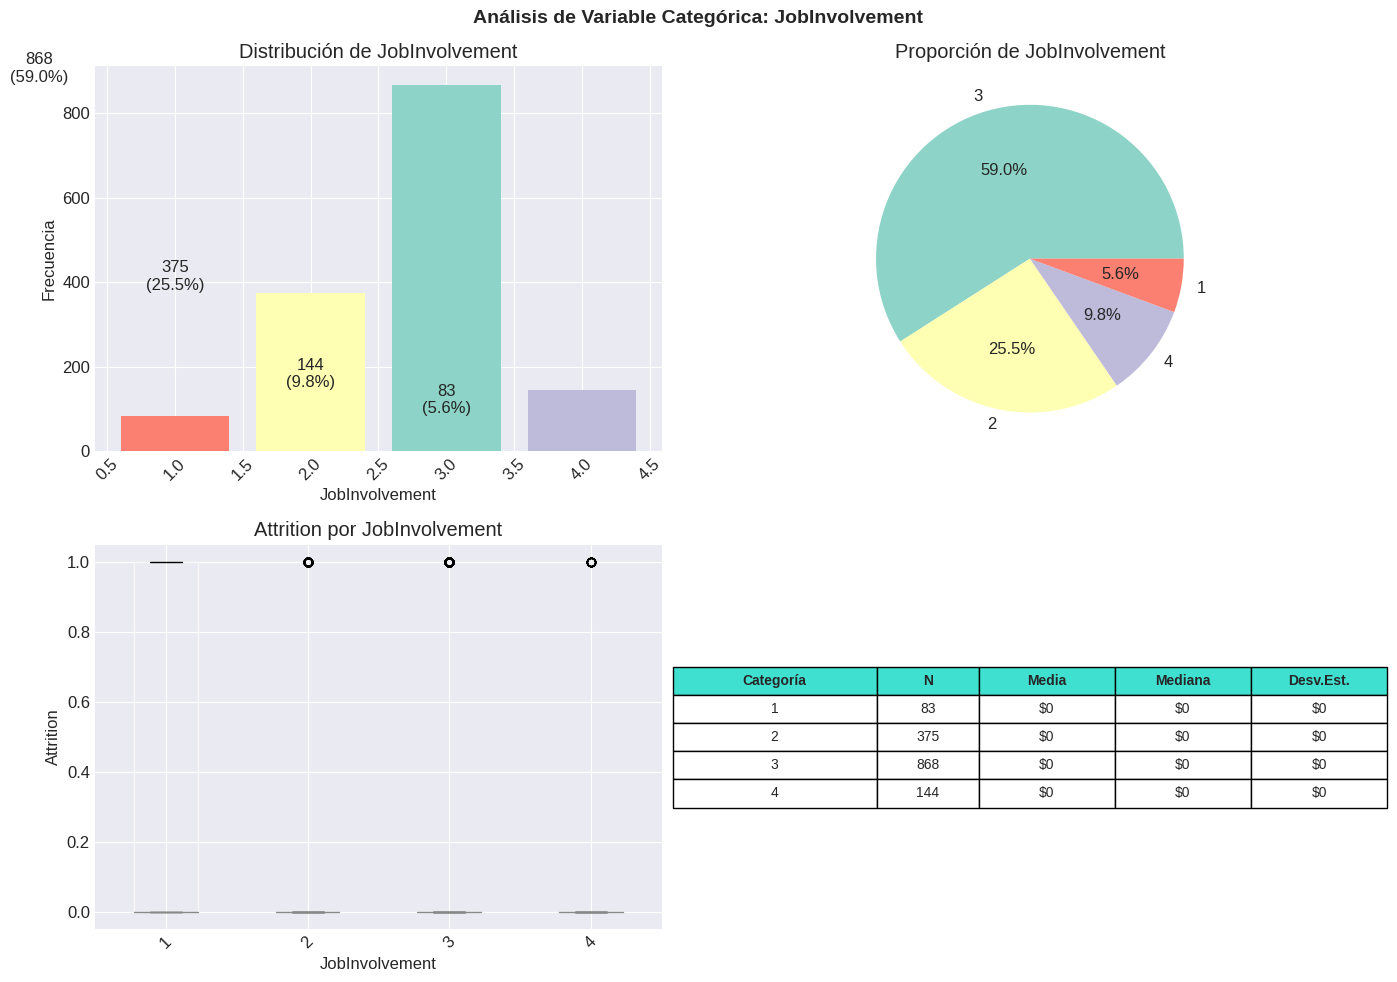

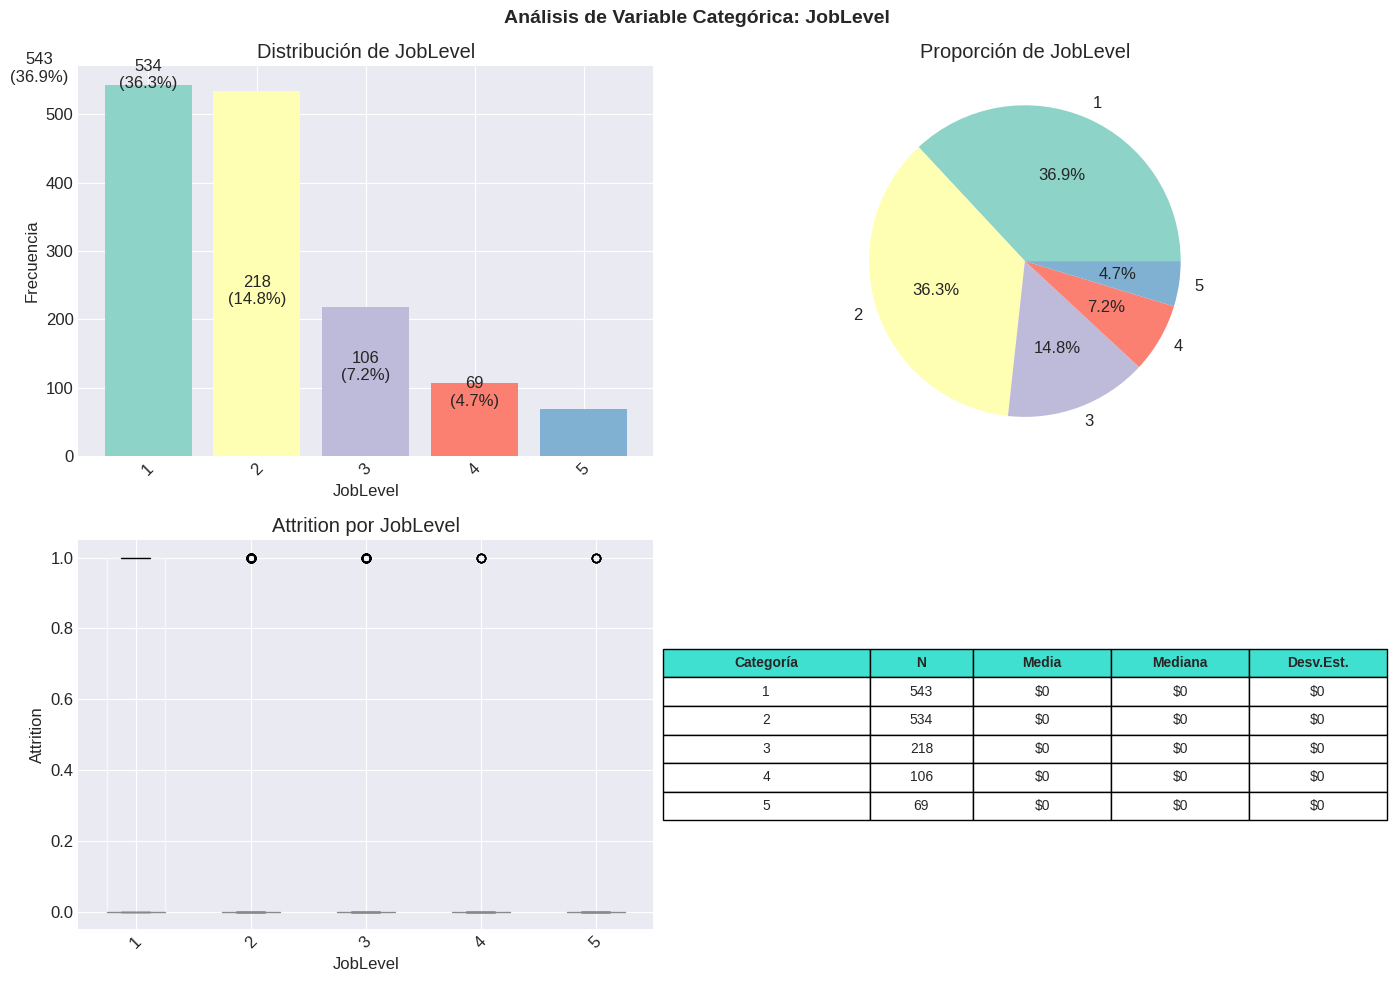

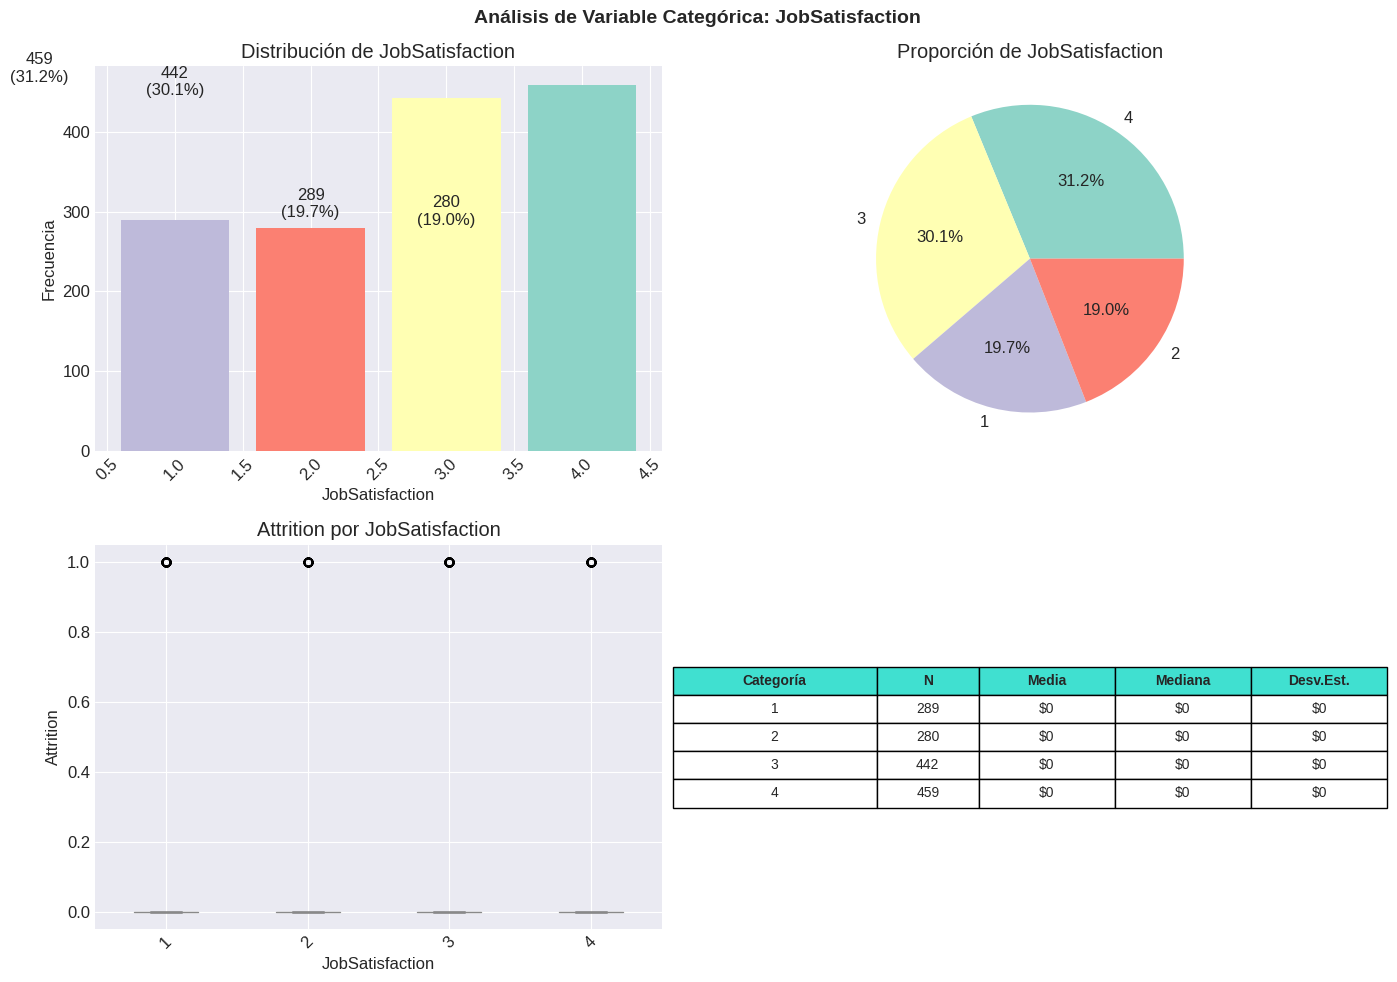

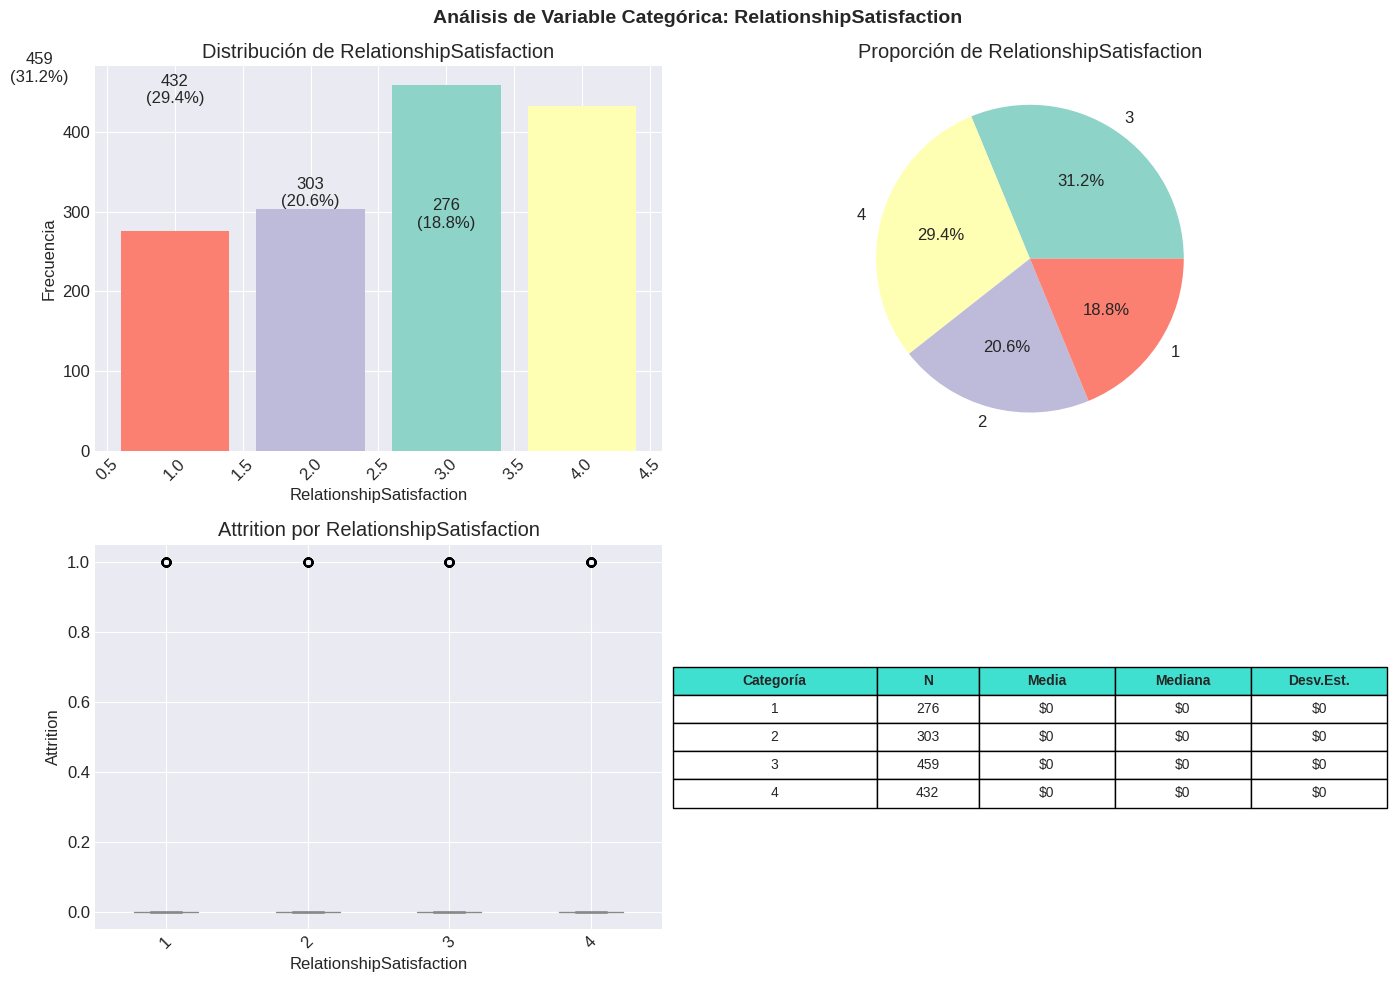

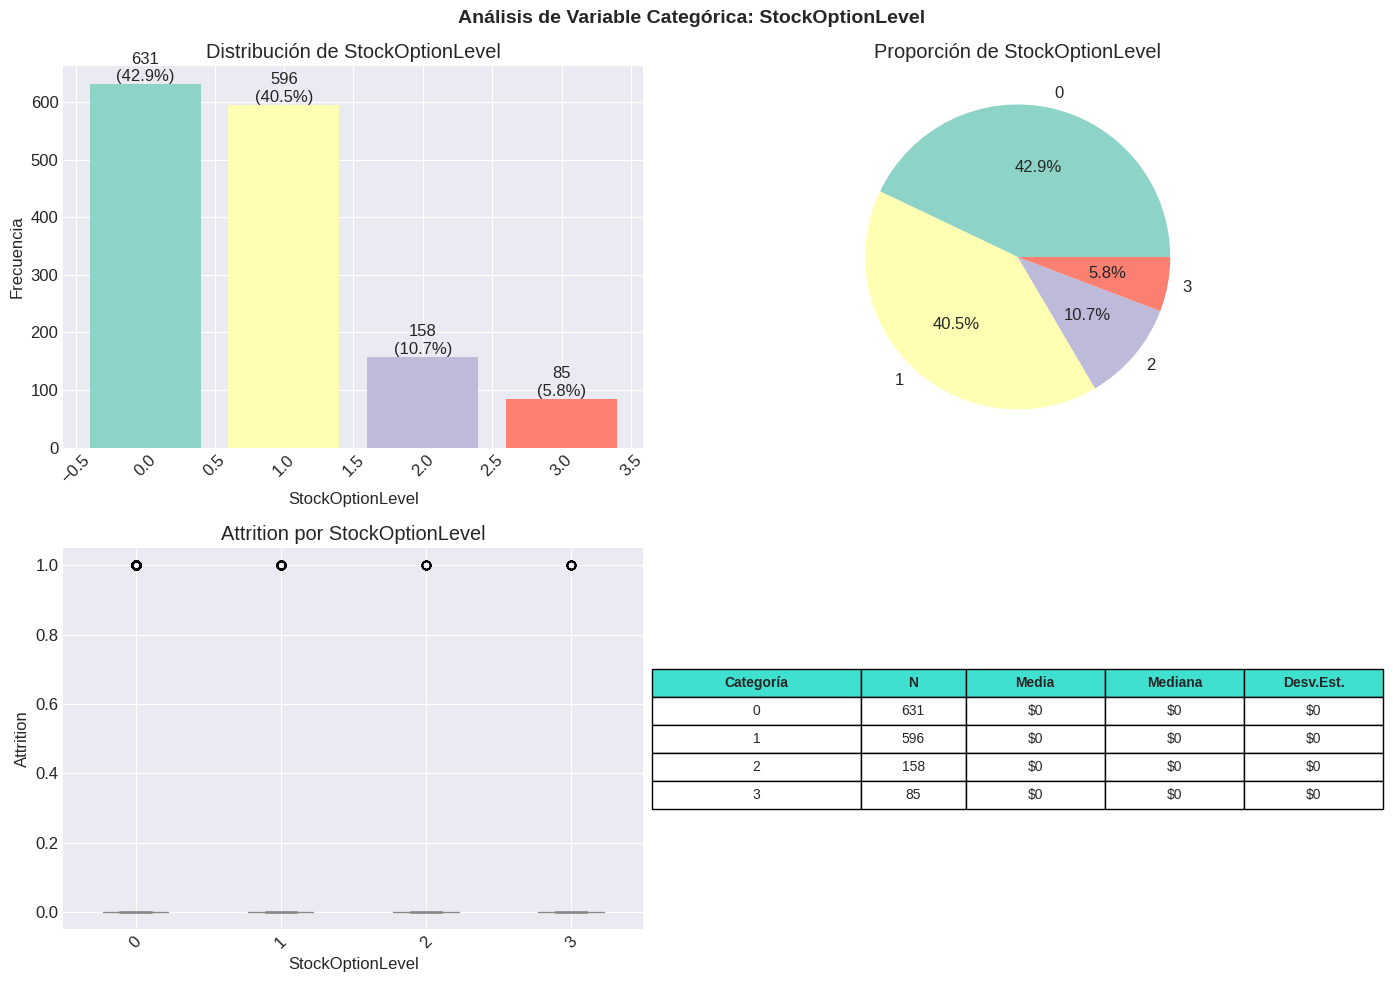

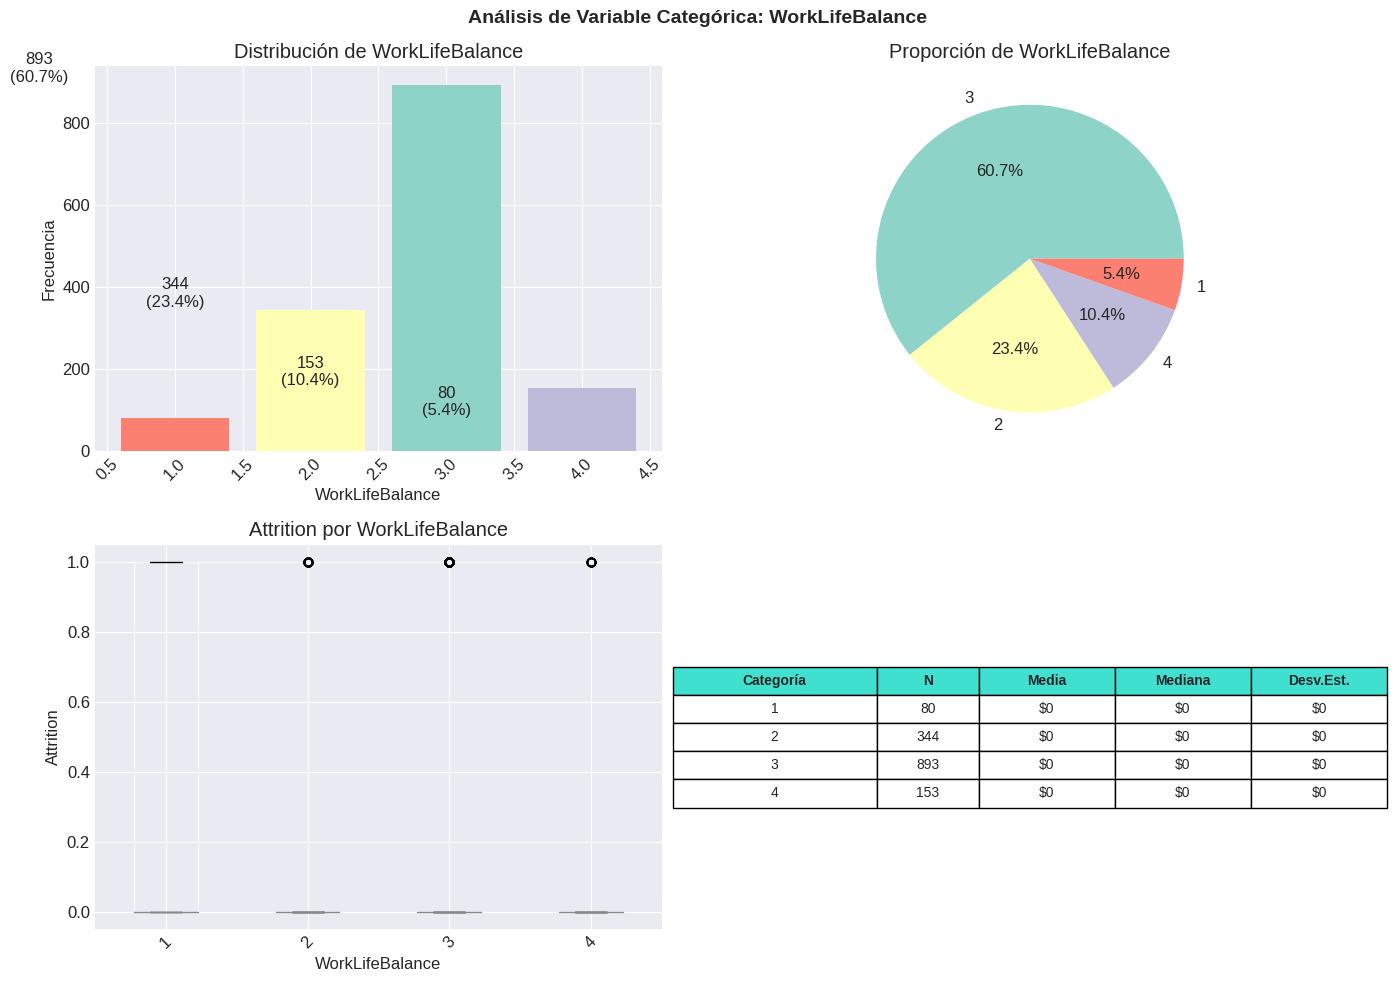

In [28]:
categorical_cols_extra = list(categorical_cols) + ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                          'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

for col in categorical_cols_extra:
  ut.analyze_categorical(data, col, feat_target)

# **4. Análisis de correlaciones**

In [18]:
# Ejemplo con target binario tipo feat_target
figs = ut.correlation_analysis(data, feat_target, threshold=0.10)


🔗 Correlaciones Significativas con el Target:
  • TotalWorkingYears        : -0.171 (Débil Negativa)
  • JobLevel                 : -0.169 (Débil Negativa)
  • YearsInCurrentRole       : -0.161 (Débil Negativa)
  • MonthlyIncome            : -0.160 (Débil Negativa)
  • Age                      : -0.159 (Débil Negativa)
  • YearsWithCurrManager     : -0.156 (Débil Negativa)
  • StockOptionLevel         : -0.137 (Débil Negativa)
  • YearsAtCompany           : -0.134 (Débil Negativa)
  • JobInvolvement           : -0.130 (Débil Negativa)
  • JobSatisfaction          : -0.103 (Débil Negativa)
  • EnvironmentSatisfaction  : -0.103 (Débil Negativa)


# **5. Detección de outliers**

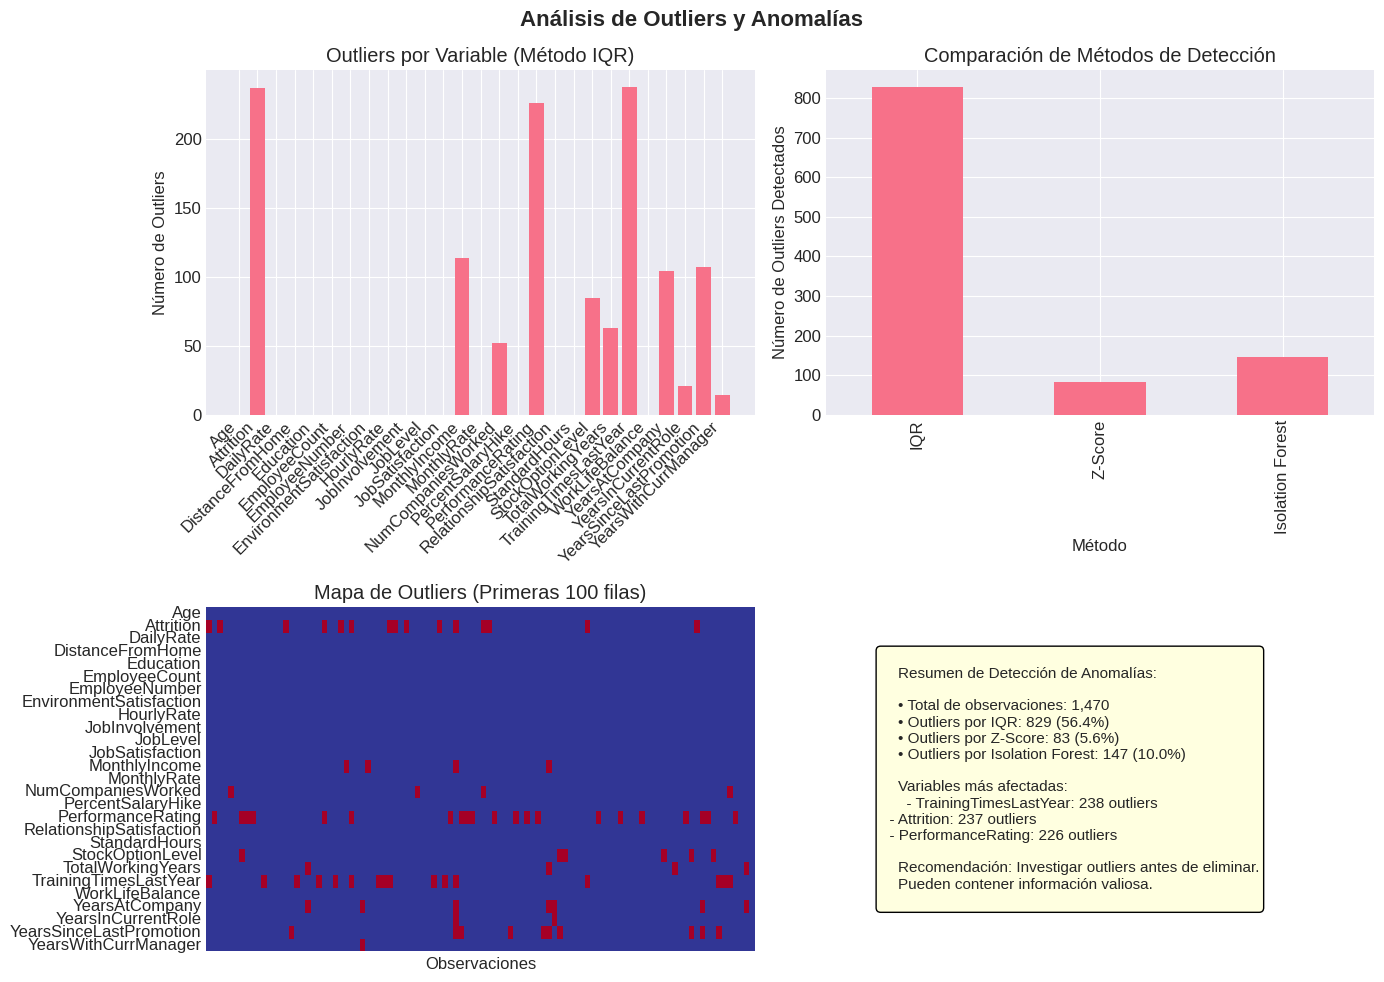

In [29]:
outliers_iqr, outliers_zscore, outliers_iso = ut.detect_outliers(data)

In [38]:
data['outlier'] = outliers_iso
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  outlier  
0                        0                     5     True  
1                        1                     7    False  
2                        0                     0    False  
3                        3                     0    False  
4                        2                     2    False

# **BASELINE**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

### Remover outliers del dataset

In [47]:
data_sin_outliers = data.loc[data['outlier'] == False].reset_index()
print('\nCantidad de oultiers total removidos:', list(outliers_iso).count(True))


Cantidad de oultiers total removidos: 147


### Definir variables finales de entrenamiento

In [53]:
feats_total = list(data_sin_outliers.columns)
feats_drop = [feat_target, 'index', 'outlier', 'EmployeeNumber', 'EmployeeCount', 'StandardHours', 'DailyRate', 'MonthlyRate']
feats_train = [item for item in feats_total if item not in feats_drop]
feats_train

['Age',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [57]:
numeric_cols = data_sin_outliers.select_dtypes(include=[np.number]).columns
print('Variables numéricas:\n', list(numeric_cols))
categorical_cols = data_sin_outliers.select_dtypes(include=['object']).columns
print('\nVariables categóricas:\n', list(categorical_cols))

Variables numéricas:
 ['index', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Variables categóricas:
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


### Particionar, codificar y estandarizar el dataset de entrenamiento

In [60]:
#Definir variables dependientes e independientes
X = data_sin_outliers[feats_train]
y = data_sin_outliers[feat_target]

#Generar particiones
X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.1,
                                                  stratify=y,
                                                  random_state=42)

perc_train = X_train.shape[0] / data_sin_outliers.shape[0]
print("Porcentaje de datos en partición train: "+"{:.1%}".format(perc_train)+" - registros: "+str(X_train.shape[0]))

perc_test = X_test.shape[0] / data_sin_outliers.shape[0]
print("Porcentaje de datos en partición test: "+"{:.1%}".format(perc_test)+" - registros: "+str(X_test.shape[0]))

# Codificar variables categoricas de entrenamiento
smoothing = 1
encoder = ce.TargetEncoder(cols=list(categorical_cols), smoothing=smoothing)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Estandarizar datos de entrenamiento
scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = RobustScaler()
X_train_std = scaler.fit_transform(X_train_encoded[feats_train])
X_test_std = scaler.transform(X_test_encoded[feats_train])

Porcentaje de datos en partición train: 89.9% - registros: 1190
Porcentaje de datos en partición test: 10.1% - registros: 133


### Definir data final de entrenamiento para torneo de modelos

In [62]:
data_train = pd.DataFrame(X_train_std, columns = feats_train)
data_train[feat_target] = y_train.reset_index()[feat_target]
data_train.head()

Age  BusinessTravel  Department  DistanceFromHome  Education  \
0 -1.52           -0.20       -0.73              0.13       0.09   
1 -1.75           -0.20        1.34              1.63      -1.91   
2  0.32           -1.87       -0.73             -1.00       0.09   
3 -0.83           -0.20        1.34             -0.50       0.09   
4  1.13            1.81        1.34             -0.50       1.09   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0            1.48                     1.16    0.81       -1.02   
1            1.48                     0.24    0.81       -0.82   
2           -0.32                     1.16    0.81        0.57   
3           -0.65                    -1.61    0.81       -1.12   
4            1.72                    -1.61    0.81        1.61   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0            1.78     -0.95    -0.27             0.23          -0.68   
1            0.35     -0.95     2.59             0.23           1.48   
2            0.35      0.06     0.83             1.15          -0.68   
3           -1.08      0.06     0.19            -0.68          -0.67   
4            0.35      0.06     0.19             1.15           1.48   

   MonthlyIncome  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  \
0          -0.94               -0.26    0.00     -0.64               0.29   
1          -0.61               -0.67    0.00     -0.64              -1.16   
2           0.12               -0.67    0.00      1.57              -0.00   
3          -0.43               -0.67    0.00      1.57              -0.58   
4          -0.05                0.55    0.00      1.57               1.74   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0              -0.38                      1.20              0.25   
1              -0.38                      0.25             -0.95   
2              -0.38                      1.20              0.25   
3              -0.38                     -0.69              0.25   
4               2.65                      0.25             -0.95   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0              -0.93                  -0.63             0.34           -0.87   
1              -1.08                  -0.63             0.34           -0.65   
2              -0.19                  -0.63             0.34            0.63   
3              -0.05                   0.15            -1.10            0.85   
4               0.54                   0.94             0.34            0.63   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0               -0.57                     0.12                 -0.54   
1               -0.57                    -0.28                 -0.54   
2                1.29                     1.35                  1.33   
3               -1.20                    -0.69                  1.64   
4                0.67                    -0.69                  1.33   

   Attrition  
0          0  
1          0  
2          0  
3          0  
4          0

### Configuración y ejecución de torneo de modelos

In [68]:
from pycaret.classification import *

setup = setup(
    data=data_train,
    target=feat_target,
    train_size=0.8, # Usar 20% de los datos como validación
    normalize=False,
    fold=10,
    n_jobs=-1,
    session_id=123
)



In [69]:
best = compare_models(n_select = 3)

Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [70]:
best[0]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
evaluate_model(best[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…